 **Time Series Project: Activity Recognition from a Single Chest-Mounted Accelerometer**

Author: Kun Jiang  (kunjiang0112@gmail.com)

Lastest update on June/05/2018

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Abstract: 
The project focuses on the analysis and prediction of acitivities of user's movement using the data collected from a wearable accelerometer mounted on the chest. In this project, we are analyzing accelerometer data trying to answer the following questions:

  a) Analyze and derive input features to find the difference in the accelerometer data from different activities. 
  
  b) Utilize accelerometer data to predict the type of activity 
  
  <img src="files/images/1.png", width="500" height="200"/>



## Prerequisites

This project has been built and tested on the following platform:
    * MacOS EI Captain 10.11.6
    * Aanaconda3 with Python 3.6
    * JupyterLab v0.27.0
Please make sure the following Python distributions and packages were installed.
* [Anaconda](https://anaconda.org)
* [Seaborn](https://seaborn.pydata.org)
* [Sklearn](http://scikit-learn.org/stable/)
* [SciPy](https://www.scipy.org/)

You'll also need to create the following sub-folder in your working folder where this ipynb file locates:

* data
  
  To store all the data files in csv format, there are 15 csv files in total 
  
* images:


In [2]:
import pandas as pd
import numpy as np
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import minmax_scale

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Data from csv files

The original data set is split into **15 csv** files, one csv file per user with file name from **1.csv to 15.csv**

        Data are separated by participant. Each file contains the following information: 
           sequential number, 
           x acceleration, 
           y acceleration, 
           z acceleration, 
           label 
        Labels are codified by numbers:
            1: Working at Computer 
            2: Standing Up, Walking and Going Up/Down stairs 
            3: Standing 
            4: Walking 
            5: Going Up/Down Stairs 
            6: Walking and Talking with Someone 
            7: Talking while Standing


In the following code, each file will be read separately into one dataframe. Then, the 15 dataframes will be kept in a  list of dataframes named **df_sets**

The column names in each dataframe: **['seq_no', 'x', 'y', 'z', 'label']**

In [3]:
# df_sets is a list which contains 15 dataframes of user data
df_sets = [pd.read_csv('data/' + str(i) + '.csv', header=None, skipinitialspace=True) for i in range(1, 16)]

In [4]:
# change the column name of each df into ['seq_no', 'x', 'y', 'z', 'label']
for df in df_sets:
    df.columns = ['seq_no', 'x', 'y', 'z', 'label']

In [5]:
# make sure that the df_sets list has 15 df from 15 users
len(df_sets)

15

In [6]:
# check the name of column in each dataframe
df_sets[0].columns.values

array(['seq_no', 'x', 'y', 'z', 'label'], dtype=object)

In [7]:
# check the dimension for each dataframe 
for i in range(0,15):
    print ('user ' + str(i+1) + ' dataframe shape: '  + str(df_sets[i].shape))

user 1 dataframe shape: (162501, 5)
user 2 dataframe shape: (138001, 5)
user 3 dataframe shape: (102341, 5)
user 4 dataframe shape: (122201, 5)
user 5 dataframe shape: (160001, 5)
user 6 dataframe shape: (140901, 5)
user 7 dataframe shape: (163001, 5)
user 8 dataframe shape: (138001, 5)
user 9 dataframe shape: (166741, 5)
user 10 dataframe shape: (126801, 5)
user 11 dataframe shape: (104451, 5)
user 12 dataframe shape: (114702, 5)
user 13 dataframe shape: (67651, 5)
user 14 dataframe shape: (116101, 5)
user 15 dataframe shape: (103501, 5)


In [8]:
# check the number of missing value in each dataframe
for i in range(0,15):
    print ('missing value in user ' + str(i+1) +  " dataframe: " + str(df_sets[i].isnull().sum().sum()))

missing value in user 1 dataframe: 0
missing value in user 2 dataframe: 0
missing value in user 3 dataframe: 0
missing value in user 4 dataframe: 0
missing value in user 5 dataframe: 0
missing value in user 6 dataframe: 0
missing value in user 7 dataframe: 0
missing value in user 8 dataframe: 0
missing value in user 9 dataframe: 0
missing value in user 10 dataframe: 0
missing value in user 11 dataframe: 0
missing value in user 12 dataframe: 0
missing value in user 13 dataframe: 0
missing value in user 14 dataframe: 0
missing value in user 15 dataframe: 0


In [9]:
# check that the label entry is correct
print(df_sets[0].label.value_counts())

7    83748
1    33677
4    26860
3    11179
5     3191
6     2917
2      928
0        1
Name: label, dtype: int64


### remove label == 0
Note that 0 exists in the label column, while it should be range from 1 to 7. There is a need to remove rows where label == 0

In [10]:
# remove rows with label == 0
for i in range(0, 15):
    df_sets[i] = df_sets[i][df_sets[i].label != 0]

In [11]:
# make sure that label == 0 entries are removed. 
print(df_sets[6].label.value_counts())

7    83701
1    32750
4    26770
3    10519
2     3600
5     2960
6     2700
Name: label, dtype: int64


In [12]:
# check the dimension for each dataframe after removing label == 0
for i in range(0,15):
    print ('after removing label 0, user ' + str(i+1) + ' dataframe shape: '  + str(df_sets[i].shape))

after removing label 0, user 1 dataframe shape: (162500, 5)
after removing label 0, user 2 dataframe shape: (137731, 5)
after removing label 0, user 3 dataframe shape: (102340, 5)
after removing label 0, user 4 dataframe shape: (122200, 5)
after removing label 0, user 5 dataframe shape: (160000, 5)
after removing label 0, user 6 dataframe shape: (140670, 5)
after removing label 0, user 7 dataframe shape: (163000, 5)
after removing label 0, user 8 dataframe shape: (137795, 5)
after removing label 0, user 9 dataframe shape: (163740, 5)
after removing label 0, user 10 dataframe shape: (126800, 5)
after removing label 0, user 11 dataframe shape: (104450, 5)
after removing label 0, user 12 dataframe shape: (114701, 5)
after removing label 0, user 13 dataframe shape: (67650, 5)
after removing label 0, user 14 dataframe shape: (116100, 5)
after removing label 0, user 15 dataframe shape: (103500, 5)


## Preliminary visualization on raw data


### label distribution
first, we need to plot the number of different activities against label to find out the distribution of different activities for each dataframe

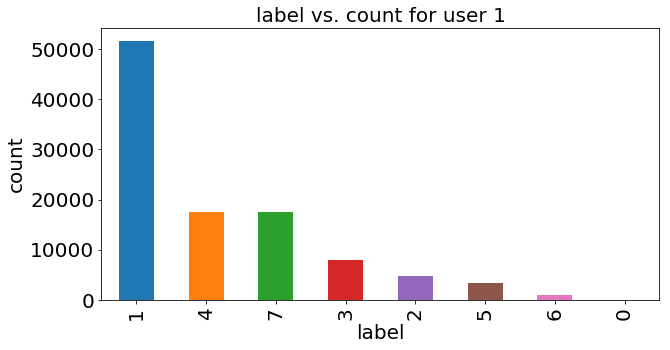

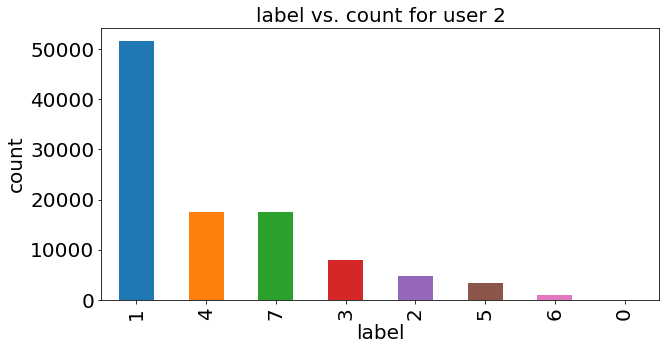

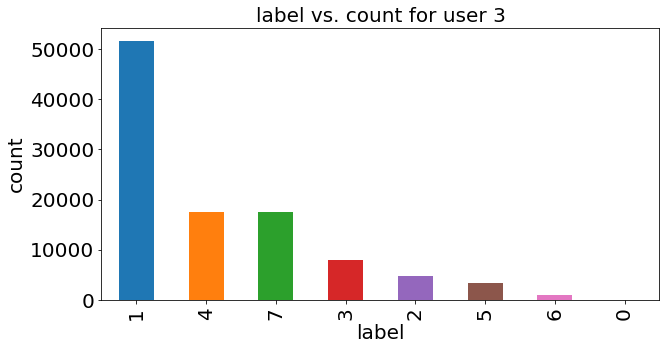

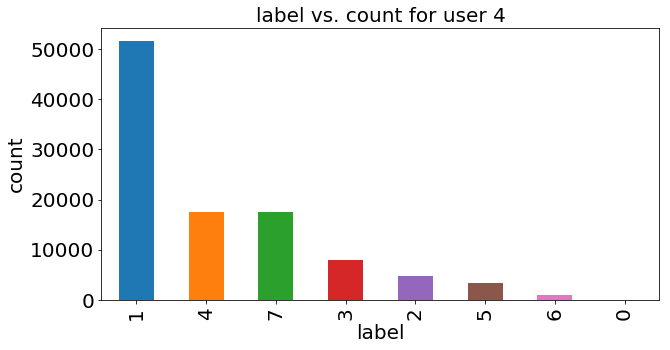

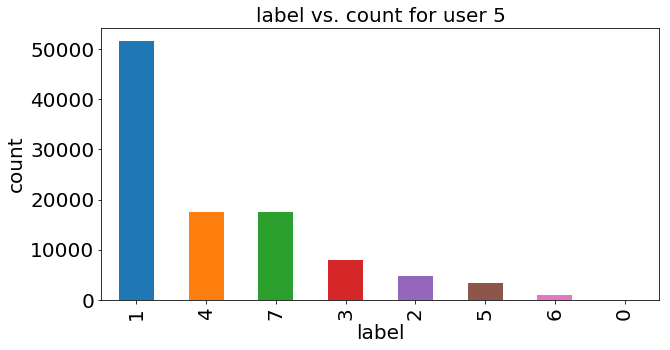

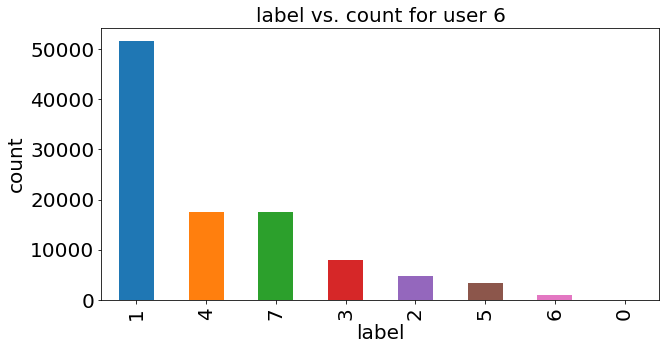

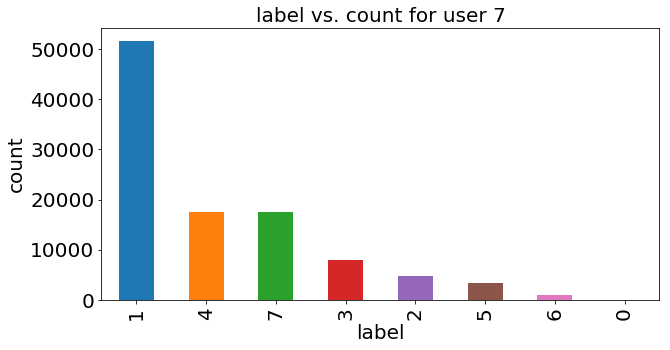

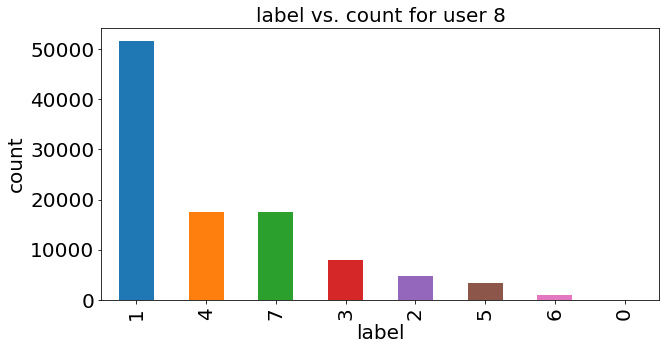

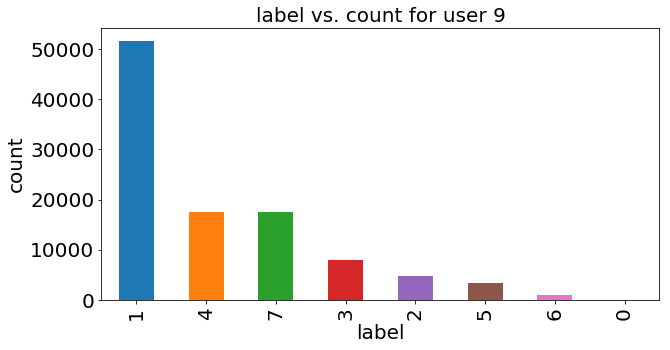

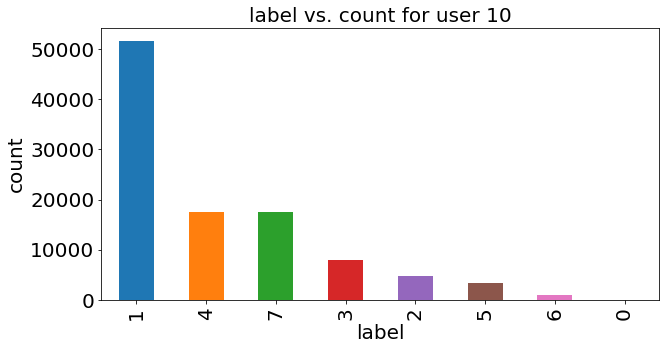

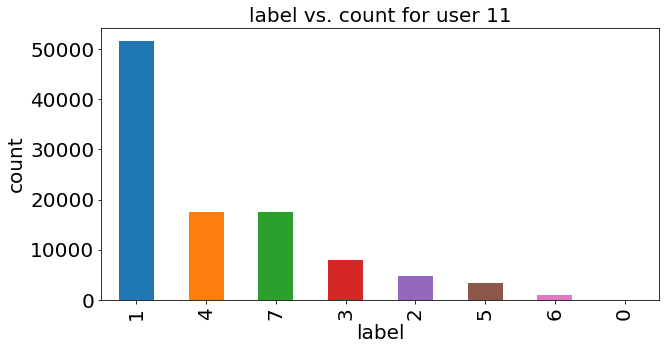

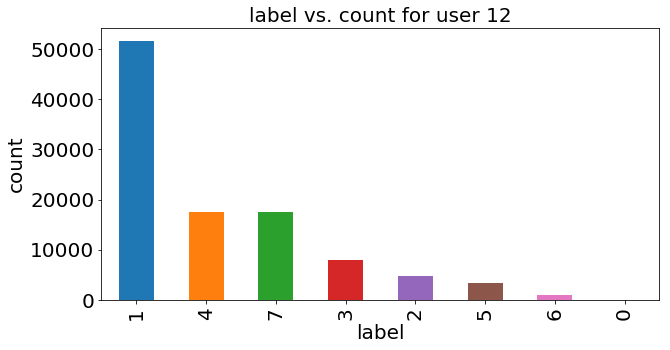

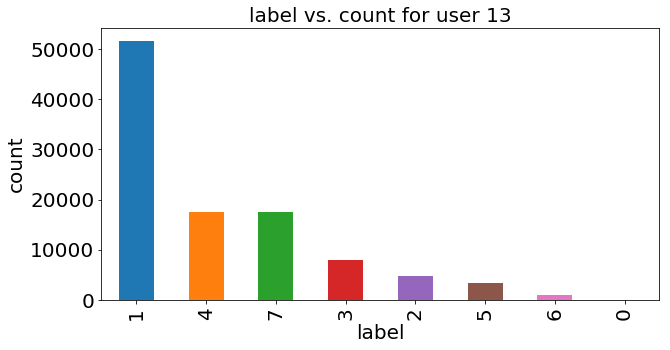

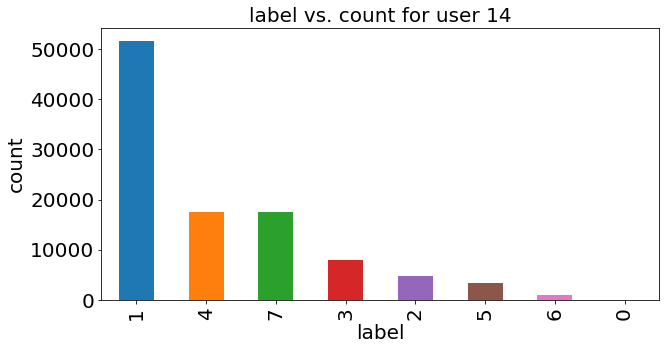

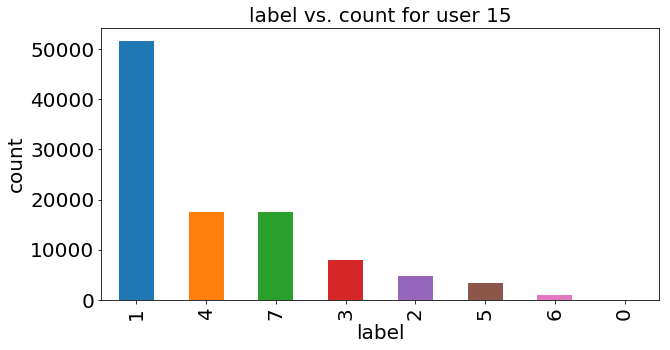

In [13]:
# plot of labels for each user
for i in range(0, 15):
    fig, ax = plt.subplots(figsize = (10, 5))
    df.label.value_counts(sort = True).plot.bar()
    ax.set_title('label vs. count for user ' + str(i + 1) ,fontsize = 20)
    ax.set_ylabel('count', color='black', fontsize=20)
    ax.tick_params('x', colors='black', labelsize = 20)
    ax.tick_params('y', colors='black', labelsize = 20)
    ax.set_xlabel('label', fontsize=20)
    plt.show()
    

### x, y, z correlation 
check the correlation between x, y, z

In [14]:
# plot the correlation between x, y, z activities
# input: user_data, user_number
    # input: user_data, dataframe
    # user_data column names: ['seq_no' 'x' 'y' 'z' 'label']
    # user_number: the No. of user

def plot_corr(dataset, num):
    corr = np.corrcoef(dataset[['x','y','z']].values.T)   
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(corr, cmap='RdBu_r', annot=True)
    plt.title('x,y,z confusion matrix for user ' + str(num + 1))
    plt.show()

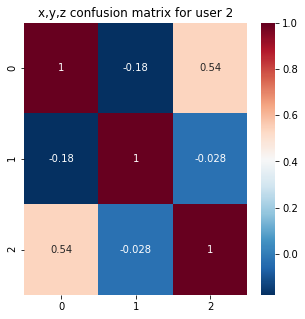

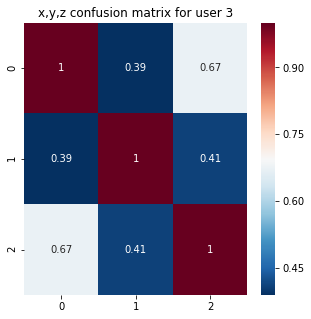

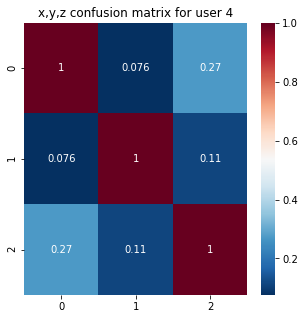

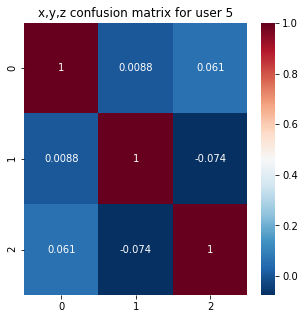

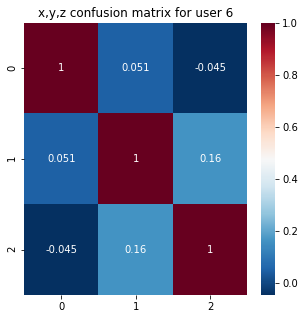

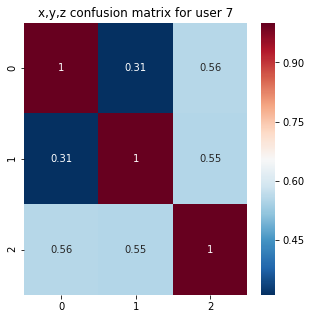

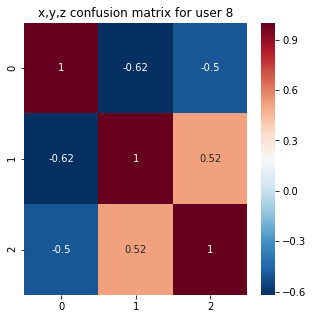

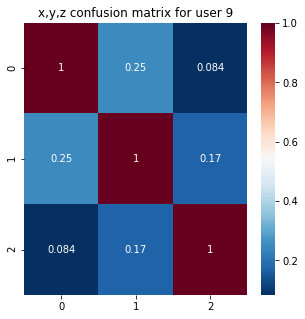

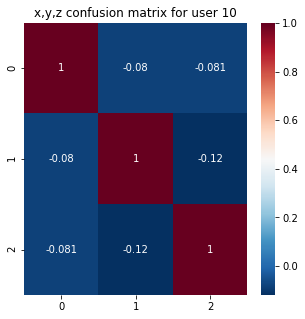

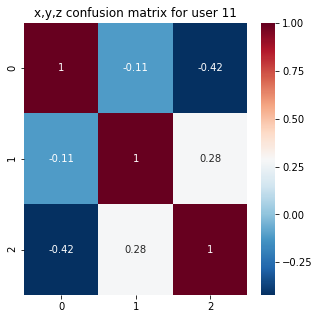

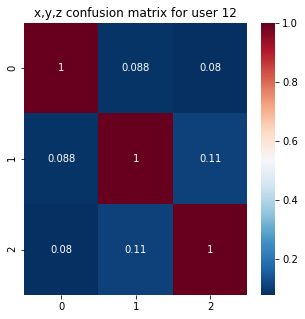

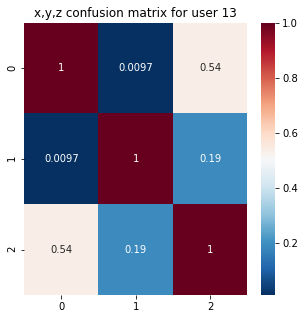

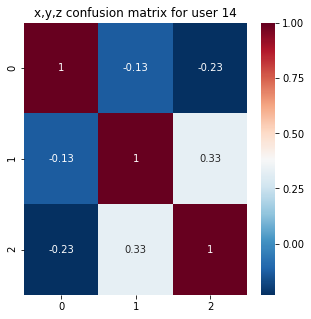

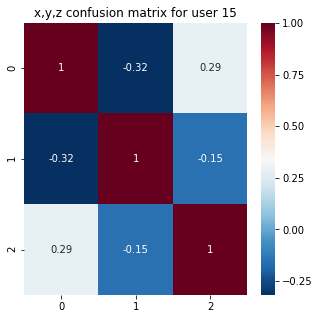

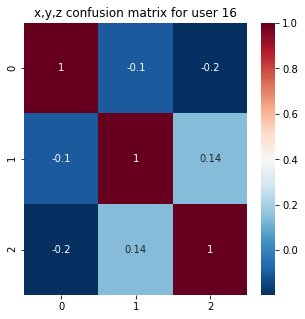

In [15]:
for i in range(0, 15):
    plot_corr(df_sets[i], i + 1)

In [16]:
# plot the x, y, z activities + label over time for a user data
# input: user_data, user_number
    # input: user_data, dataframe
    # user_data column names: ['seq_no' 'x' 'y' 'z' 'label']
    # user_number: the No. of user

def plot_activity(user_data, user_number):
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # plot x,y,z activities on ax1
    ax1.plot(user_data['seq_no'], user_data['x'], color="c", linewidth=1, linestyle="-", label = 'x')
    ax1.plot(user_data['seq_no'], user_data['y'], color="green", linewidth=1, linestyle="-", label = 'y')
    ax1.plot(user_data['seq_no'], user_data['z'], color="blue", linewidth=1, linestyle="-", label = 'z')
    
    # set title, label, tick_params, and legend pos
    ax1.set_title('sequential number vs. activity and label for user ' + str(user_number) ,fontsize = 20)
    ax1.set_ylabel('activities', color='b', fontsize=20)
    ax1.tick_params('x', colors='black', labelsize = 20)
    ax1.tick_params('y', colors='black', labelsize = 20)
    ax1.set_xlabel('number', fontsize=20)
    ax1.legend(loc='lower right', fontsize=20)

    # instantiate a second axes: ax2,  that shares the same x-axis
    ax2 = ax1.twinx()
    
    # plot label on ax2
    ax2.plot(user_data['seq_no'], user_data['label'], color="red", linewidth=5, linestyle="-", label = 'label')
    
    # set label, tick_params, and legend pos
    ax2.set_ylabel('label', color='red', fontsize=20)
    ax2.tick_params('y', colors='red', labelsize = 20)
    ax2.legend(loc='upper right', fontsize=20)
    
    fig.tight_layout()
    plt.show()


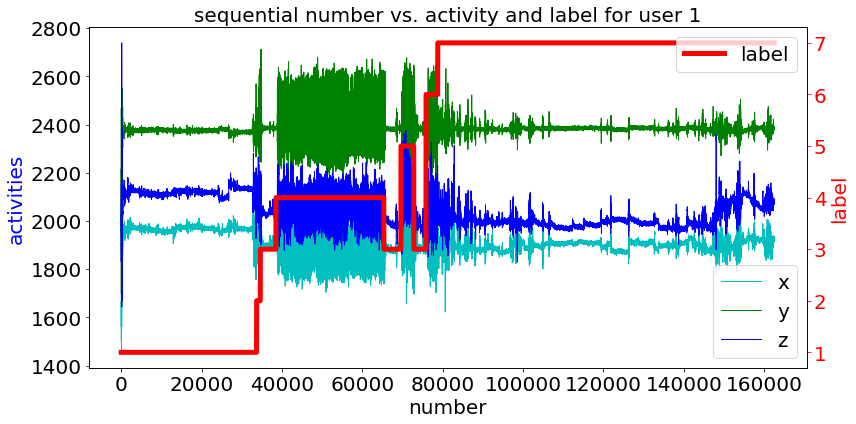

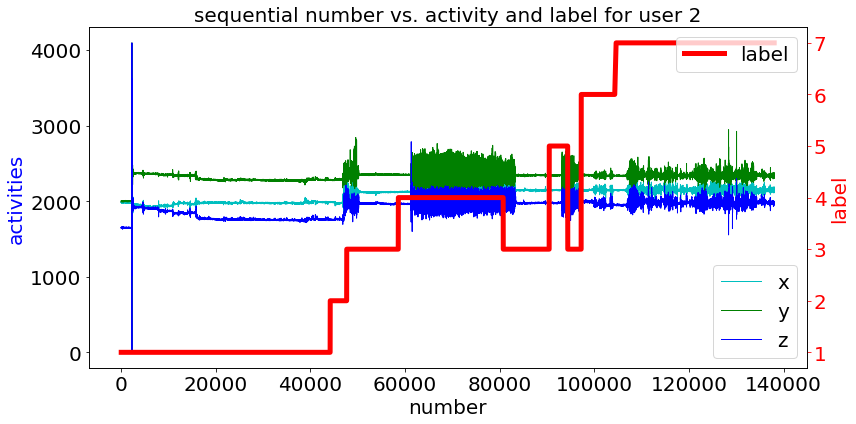

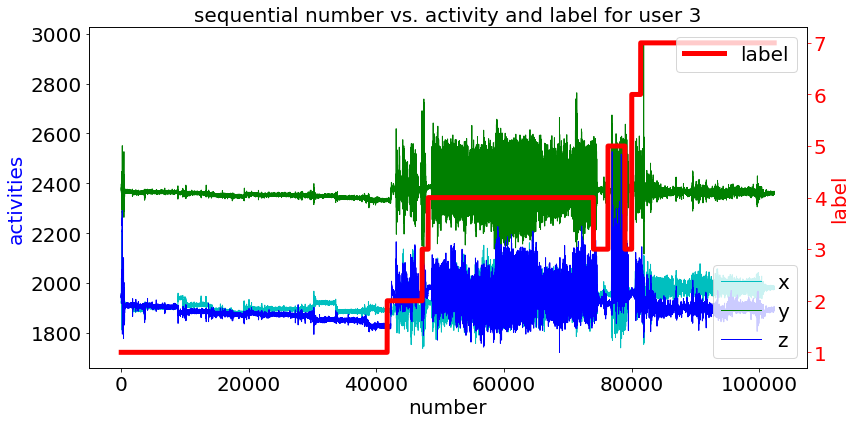

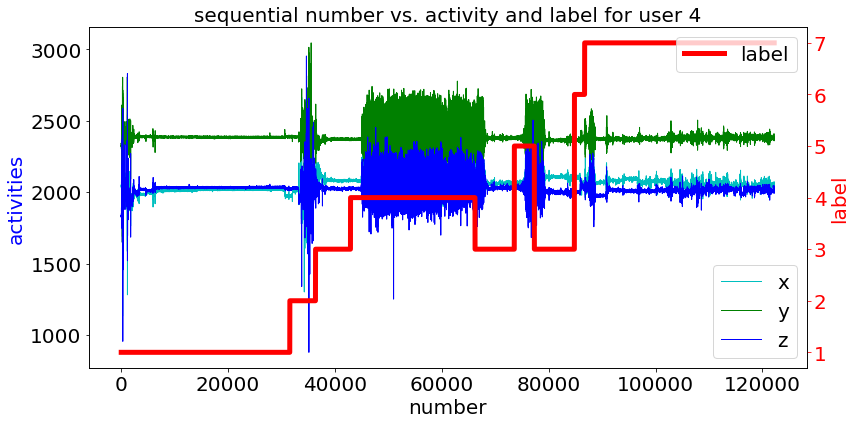

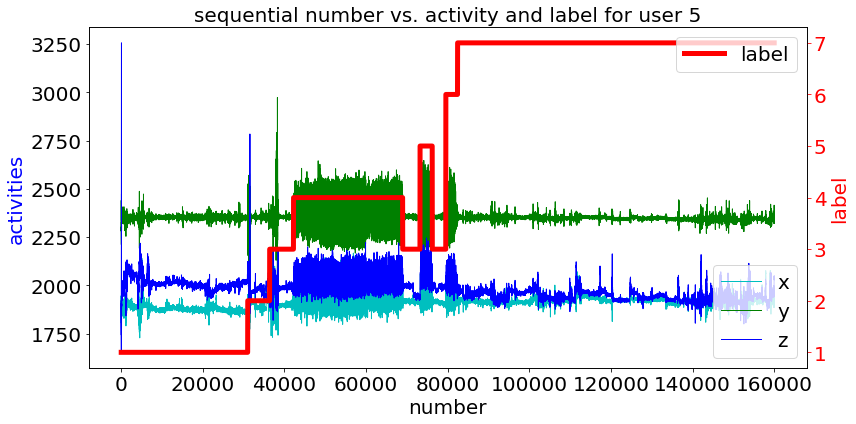

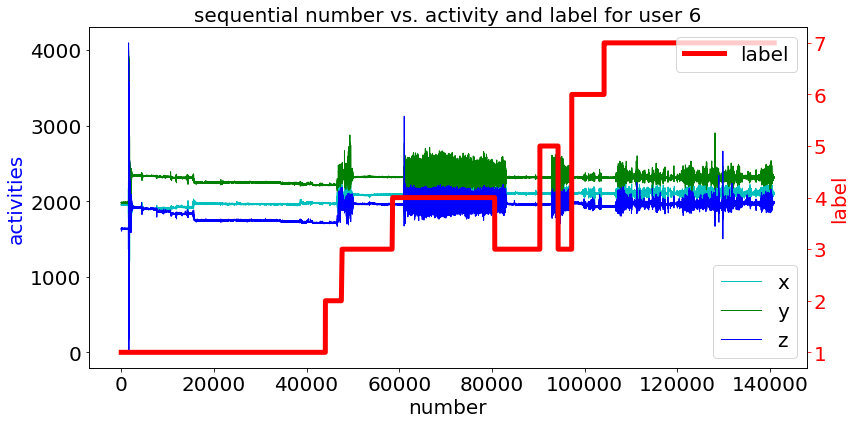

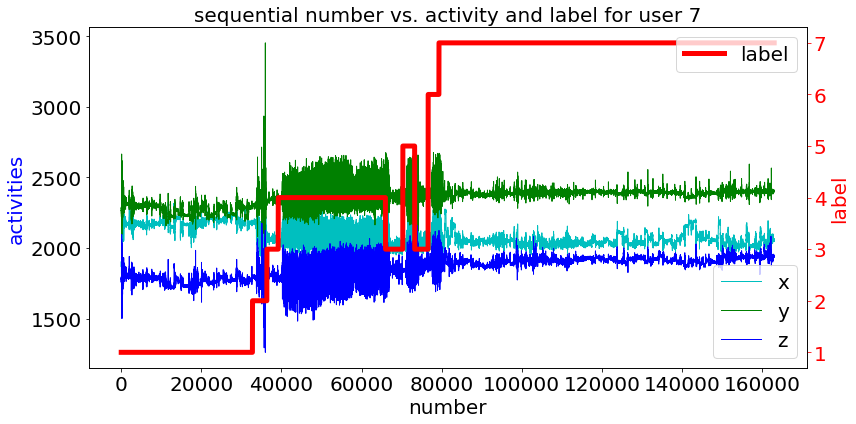

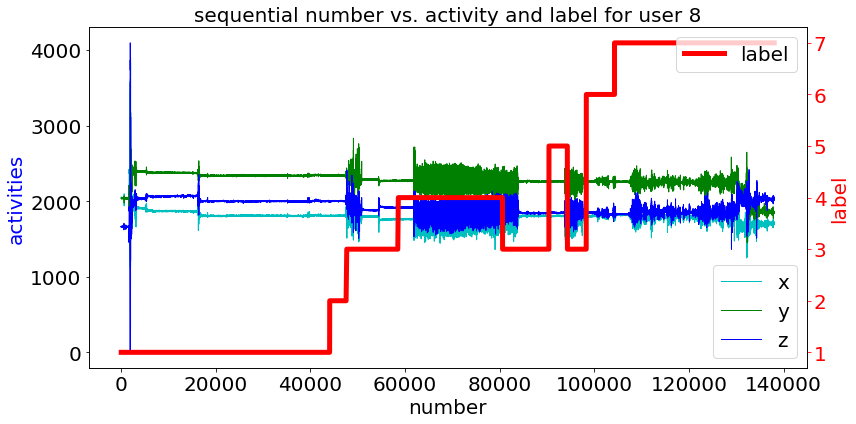

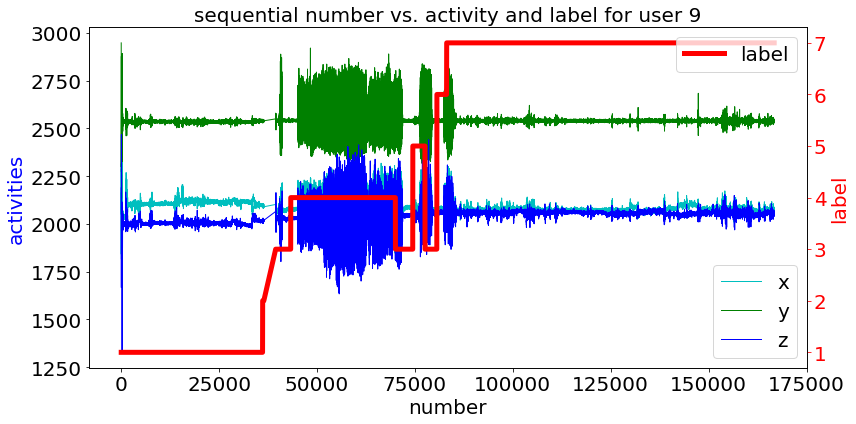

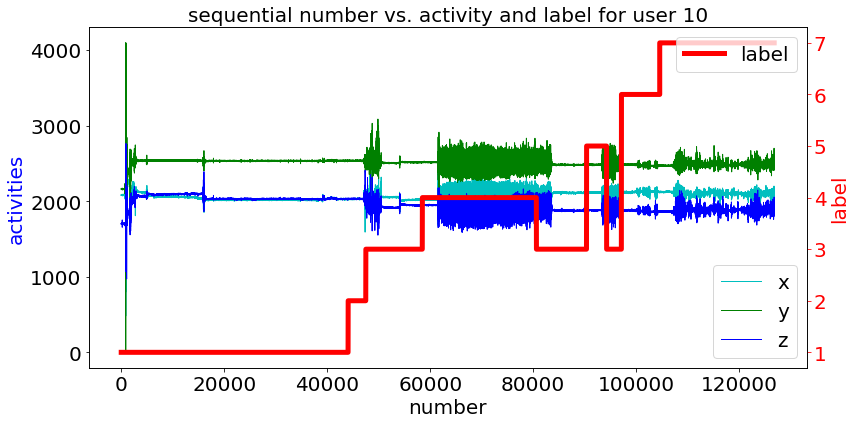

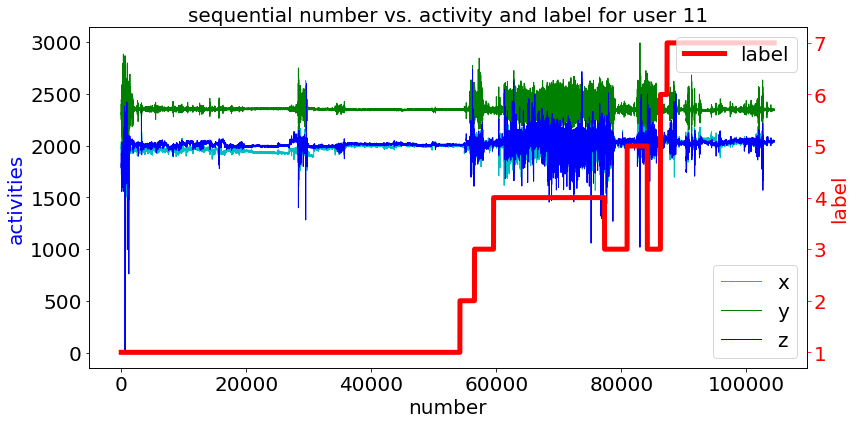

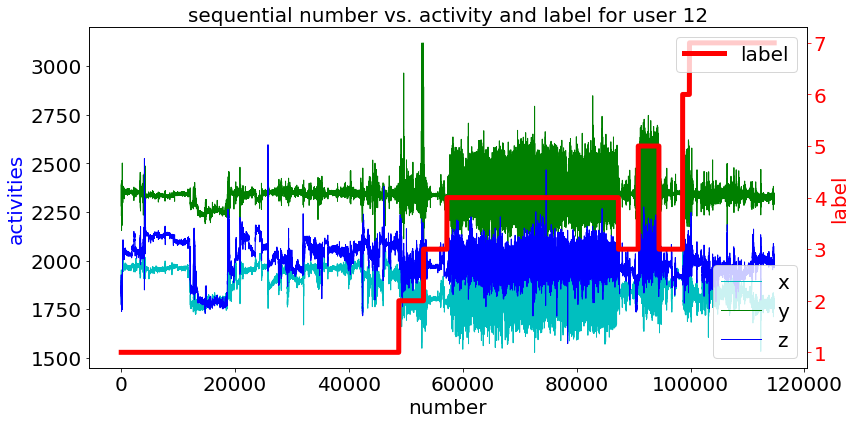

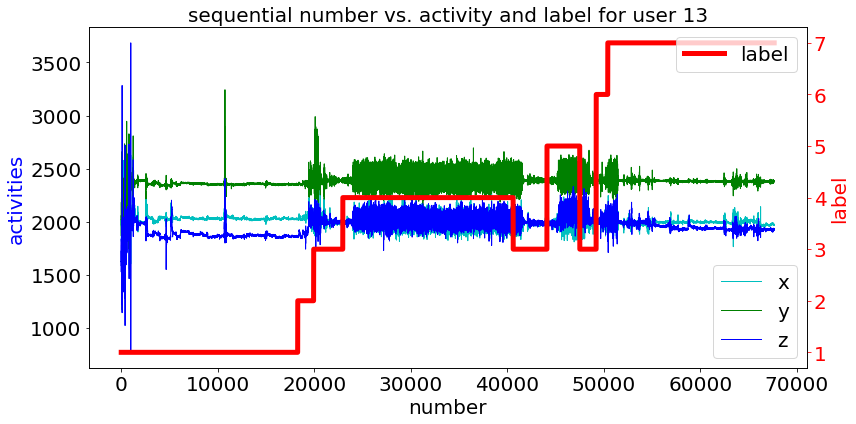

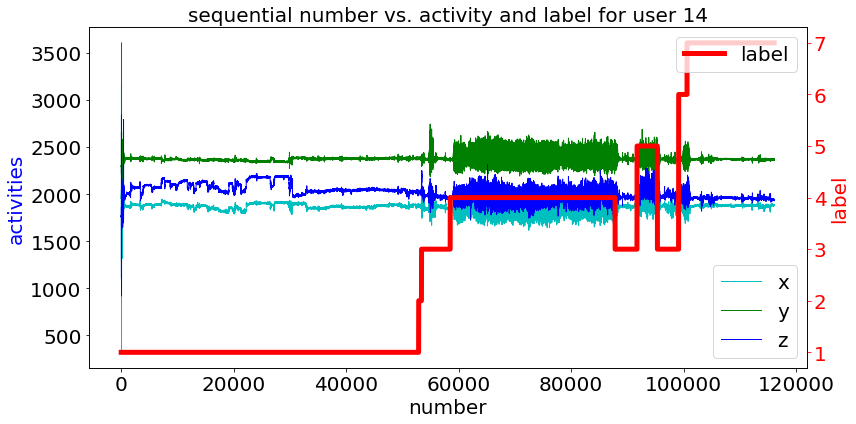

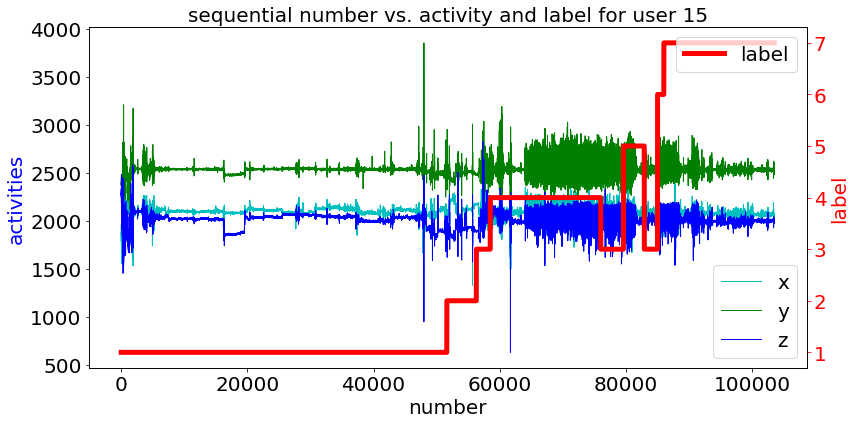

In [17]:
for i in range(0, 15):
    plot_activity(df_sets[i], i + 1)

# Data Preprocessing 

In this step, data preprocessing has been implemented to improve the quality of the data in the following aspects:

 * 1: remove the noise in x,y,z after the accelerometers are set up
 * 2: normalize datasets on x, y, z, this is important since the accelerometers are uncalibrated
 * 3: in some user data, there is a misalignment of activities with x,y,z data, so it is necessary to correct the misalignment
 * 4: smooth x,y,z curve by applying rolling window mean
    <img src="files/images/2.png", width="500" height="300"/>


In [18]:
# make a copy of df_sets into proc_df_sets to keep df_sets intact during data processing
proc_df_sets = df_sets

### remove noise
first, lets remove noises data at the beginning, here we are removing the first 5000 data points in each dataset

In [19]:
for i in range(0,15):
    proc_df_sets[i] = proc_df_sets[i][5000:]
    print ('new user ' + str(i+1) + ' df shape after removing first 5000 noise data: '  + str(proc_df_sets[i].shape))

new user 1 df shape after removing first 5000 noise data: (157500, 5)
new user 2 df shape after removing first 5000 noise data: (132731, 5)
new user 3 df shape after removing first 5000 noise data: (97340, 5)
new user 4 df shape after removing first 5000 noise data: (117200, 5)
new user 5 df shape after removing first 5000 noise data: (155000, 5)
new user 6 df shape after removing first 5000 noise data: (135670, 5)
new user 7 df shape after removing first 5000 noise data: (158000, 5)
new user 8 df shape after removing first 5000 noise data: (132795, 5)
new user 9 df shape after removing first 5000 noise data: (158740, 5)
new user 10 df shape after removing first 5000 noise data: (121800, 5)
new user 11 df shape after removing first 5000 noise data: (99450, 5)
new user 12 df shape after removing first 5000 noise data: (109701, 5)
new user 13 df shape after removing first 5000 noise data: (62650, 5)
new user 14 df shape after removing first 5000 noise data: (111100, 5)
new user 15 df sha

### normalize by minmax_normalize
second, since each accelerometer is not calibrated, it is necessary to normalize data to make sure data from different user are comparable. In this case, we are normalize x, y, z data using min_max normalization

In [20]:
# normalize dataframe's x, y, z using min_max normalization
def minmax_norm(df):
    df['x'] = (df['x'] - df['x'].min())/ (df['x'].max() - df['x'].min())
    df['y'] = (df['y'] - df['y'].min())/ (df['y'].max() - df['y'].min())
    df['z'] = (df['z'] - df['z'].min())/ (df['z'].max() - df['z'].min())
    return df

In [21]:
for i in range(0, 15):
    proc_df_sets[i] = minmax_norm(proc_df_sets[i])

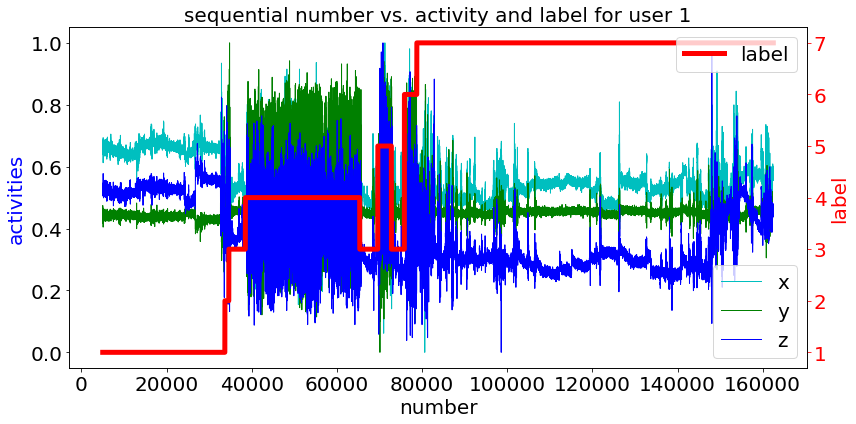

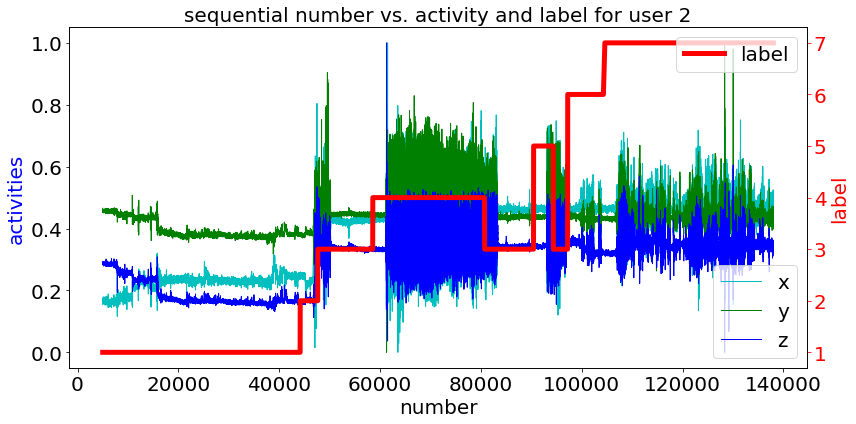

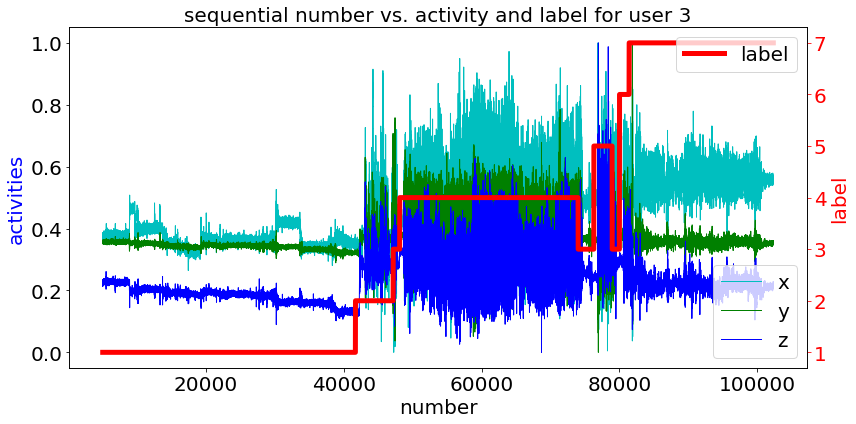

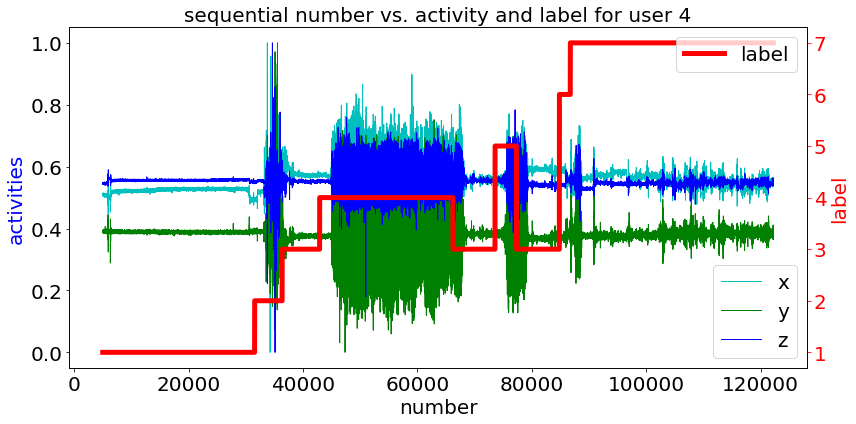

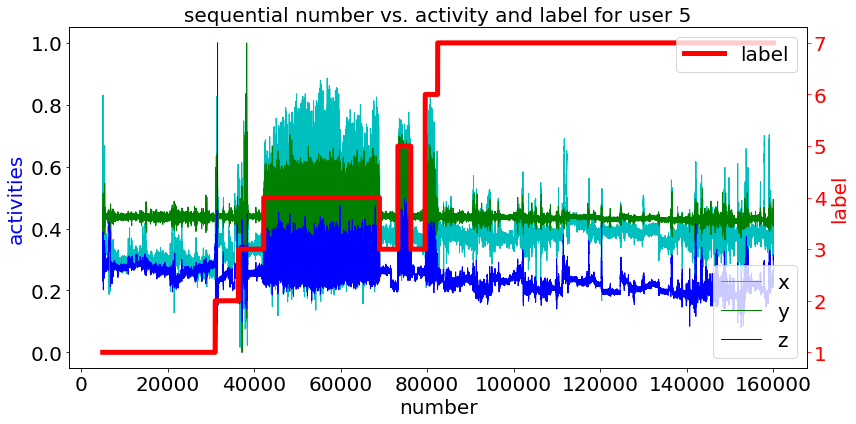

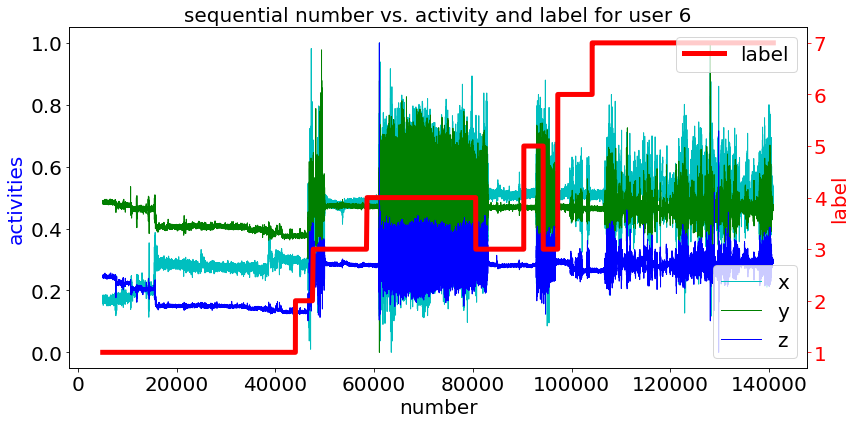

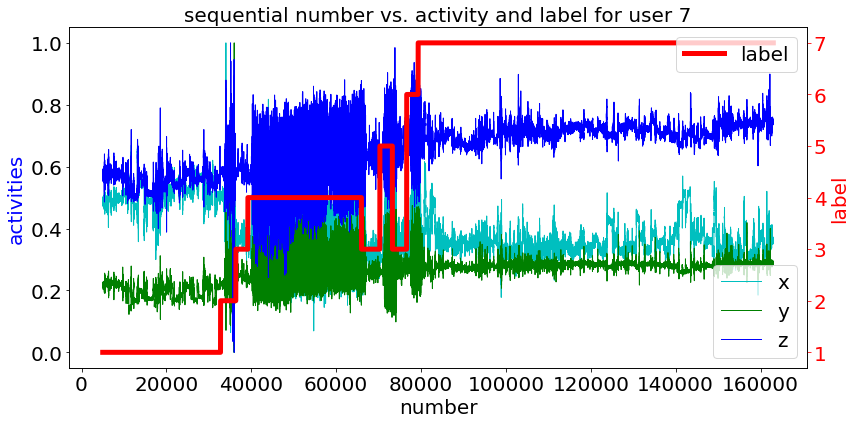

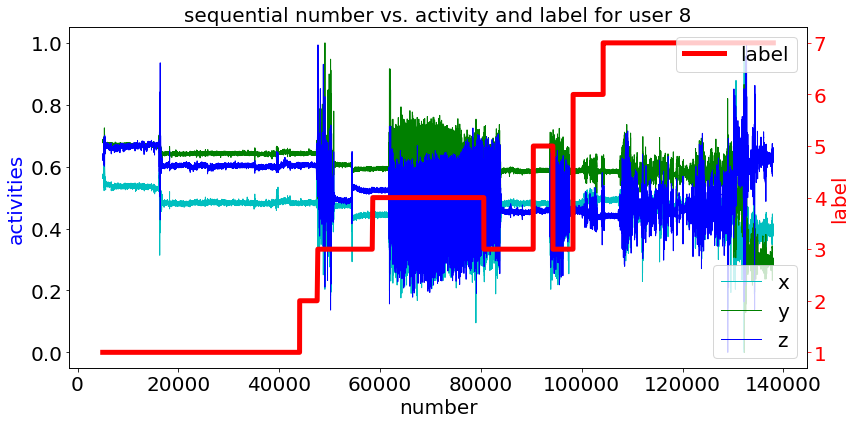

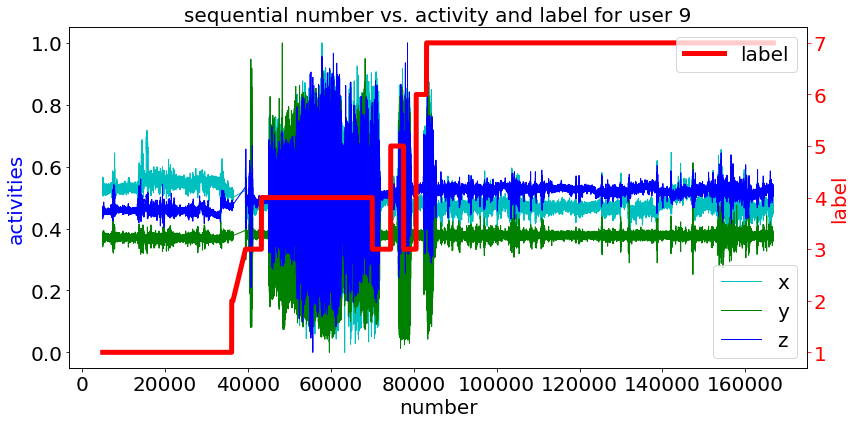

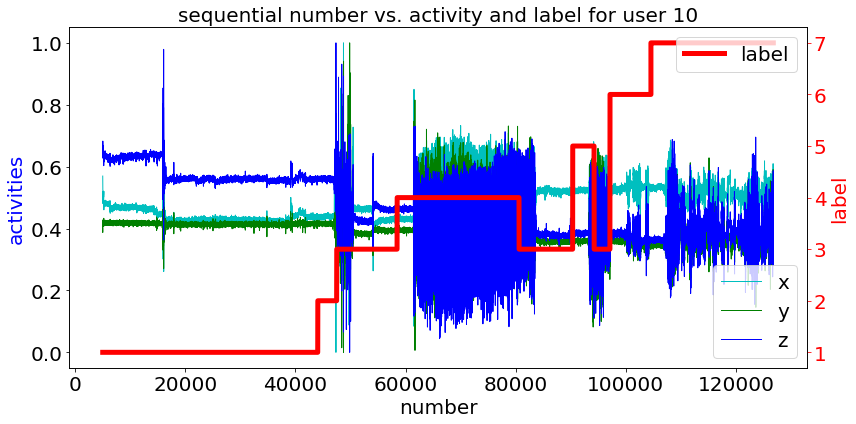

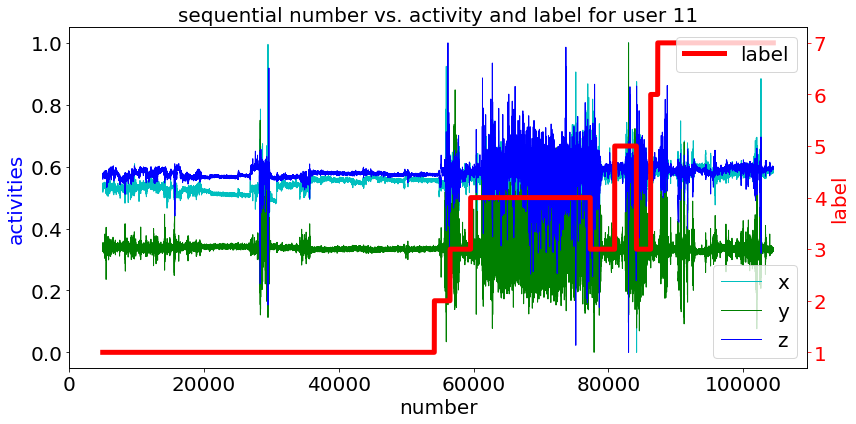

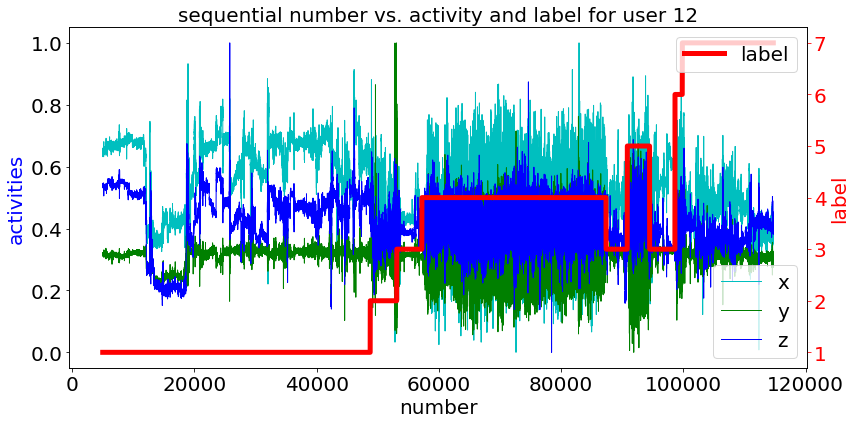

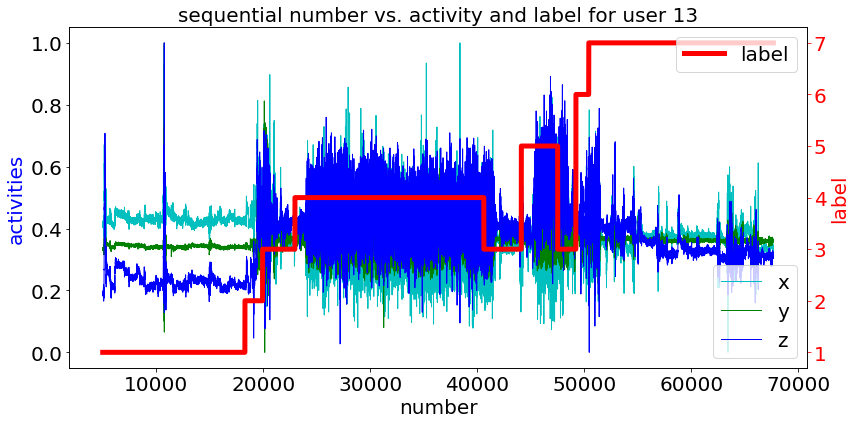

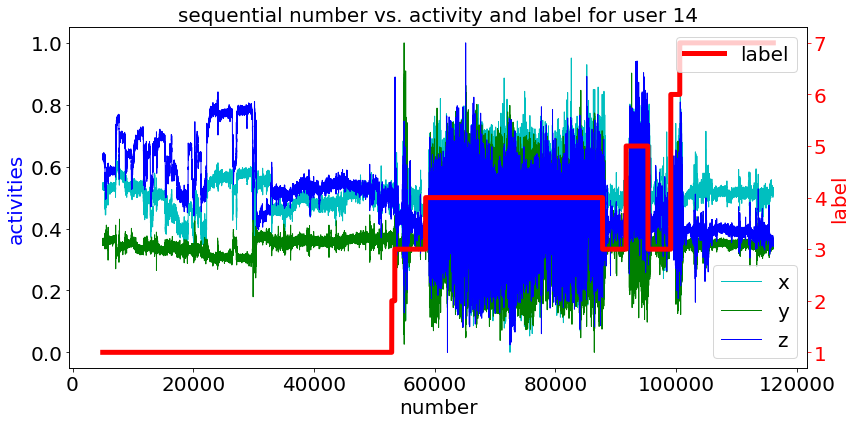

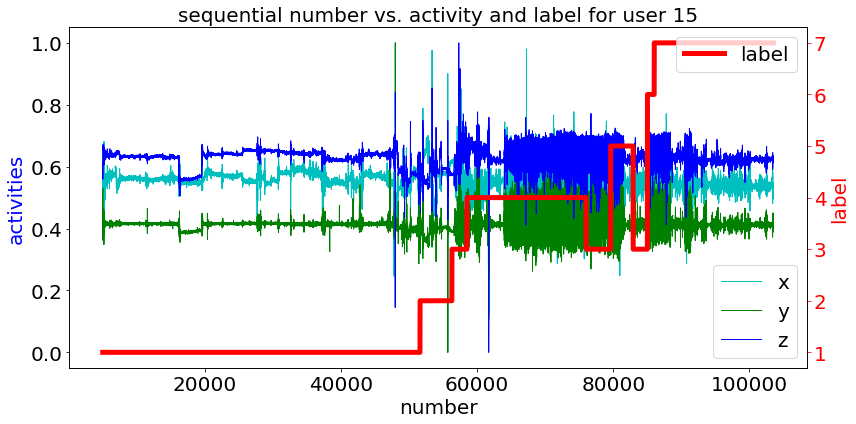

In [22]:
# plot dataset after normalization
for i in range(0, 15):
    plot_activity(proc_df_sets[i], i + 1)

### correct misalignment
Third, it has been noticed that there are some misalignment between label and x,y,z data. For example, there are some activities with a lot of movement (i.e. walking) labeled with activities of low movement (check user 9's data plot). This could come from a mismatch from x,y,z data with label. 

In this step, the misalignment is manually corrected by shifting the label data

In [23]:
# correct the misalignment in the x,y,z with respect to the label
# input: dataframe, the number of step need to be moved
# output: new dataframe after misalignment correction

def correct_alignment(dataset, step):
    length = dataset.shape[0]
    tl = dataset[['seq_no', 'label']][:length-step].reset_index()
    xyz = dataset[['x', 'y', 'z']][step:].reset_index()[['x', 'y', 'z']]
    return pd.concat([tl, xyz], axis=1)[['seq_no', 'x', 'y', 'z', 'label']]

In [24]:
# steps was manually selected by comparing the misalignment on the chart

steps = [0, 2600, 250, 2050, 0, 2350, 250, 3250, 1700, 2650, 1000, 0, 1100, 100, 5500]

for i in range(0, 15):
    proc_df_sets[i] = correct_alignment(proc_df_sets[i], int(steps[i]))
    
    print ('dataframe ' + str(i + 1) + " is moved " + str(steps[i]) + ' steps')

dataframe 1 is moved 0 steps
dataframe 2 is moved 2600 steps
dataframe 3 is moved 250 steps
dataframe 4 is moved 2050 steps
dataframe 5 is moved 0 steps
dataframe 6 is moved 2350 steps
dataframe 7 is moved 250 steps
dataframe 8 is moved 3250 steps
dataframe 9 is moved 1700 steps
dataframe 10 is moved 2650 steps
dataframe 11 is moved 1000 steps
dataframe 12 is moved 0 steps
dataframe 13 is moved 1100 steps
dataframe 14 is moved 100 steps
dataframe 15 is moved 5500 steps


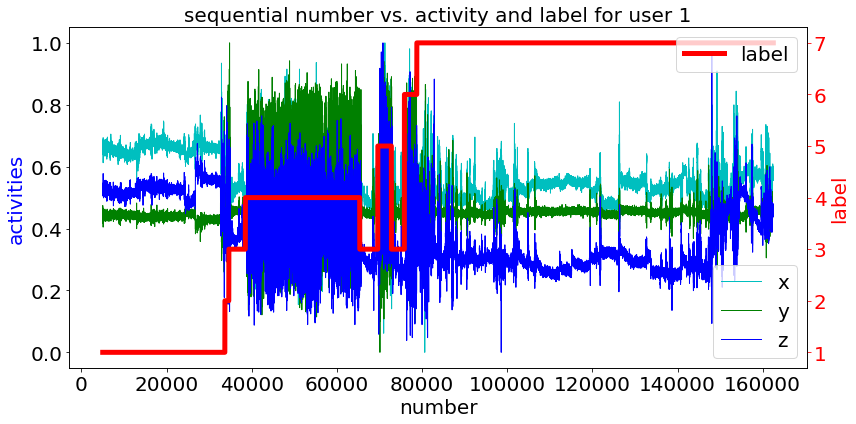

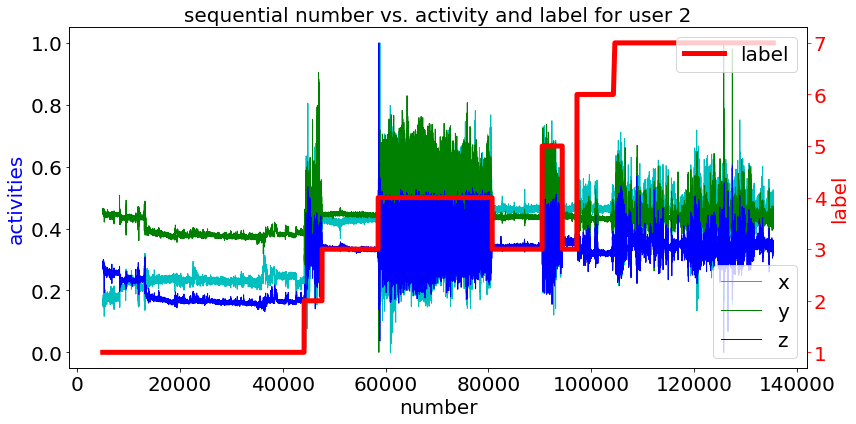

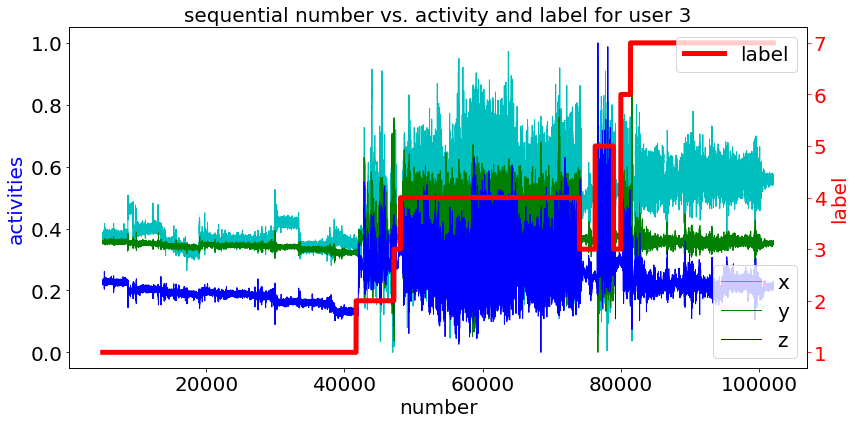

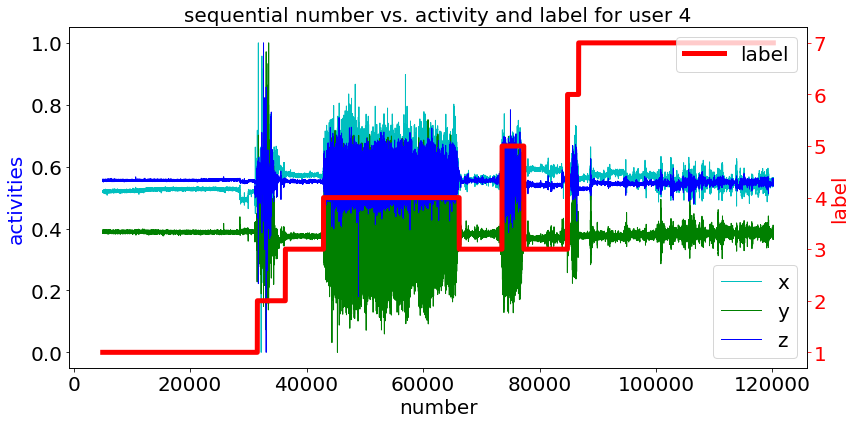

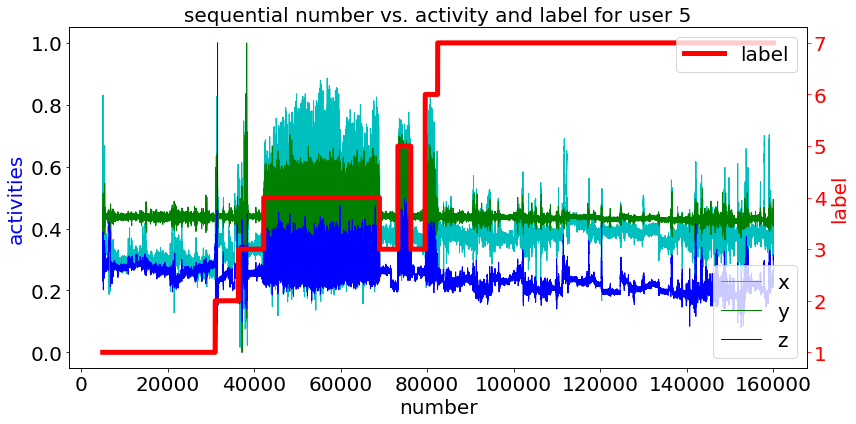

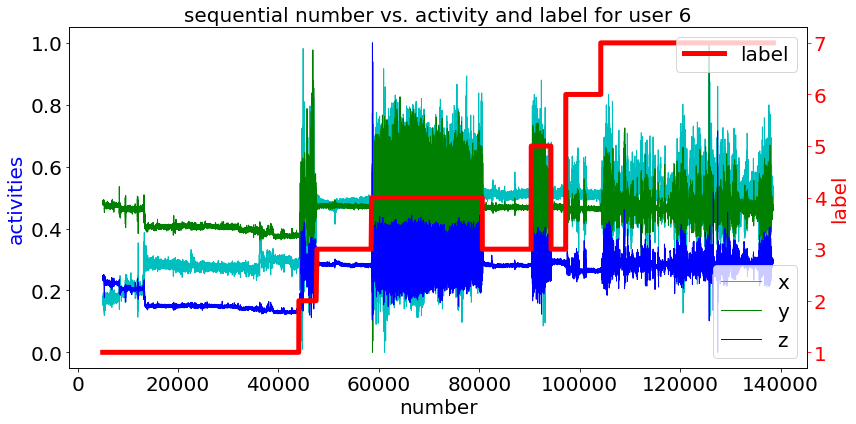

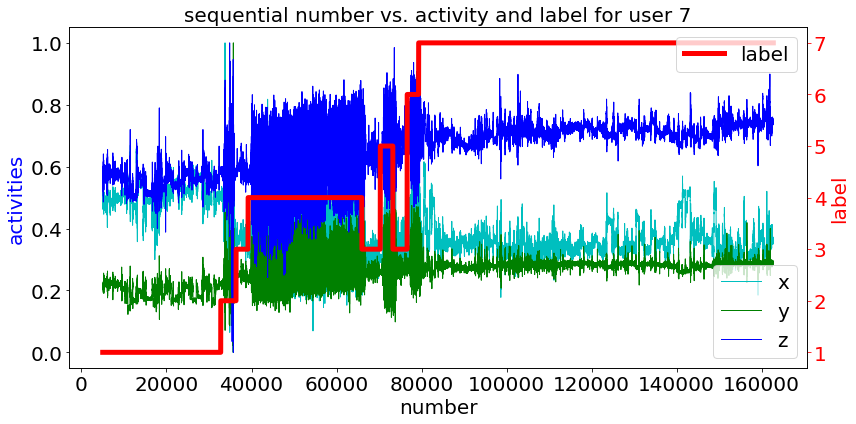

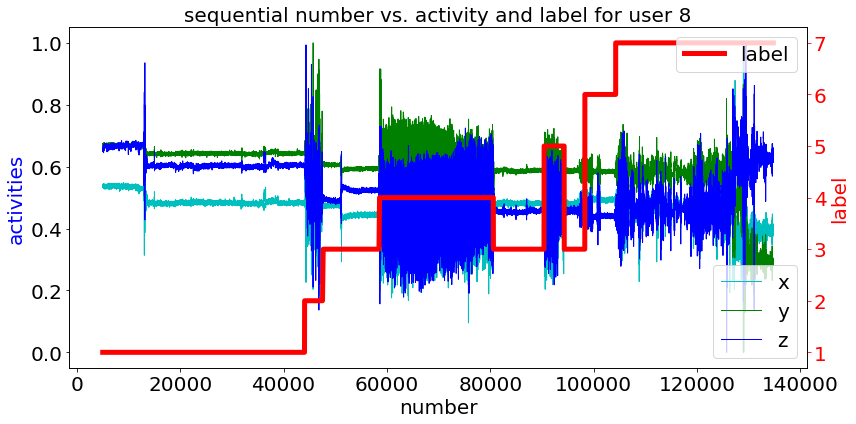

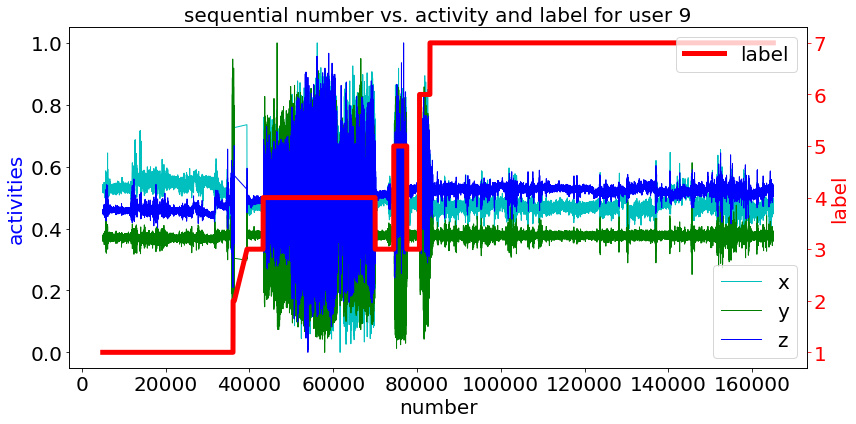

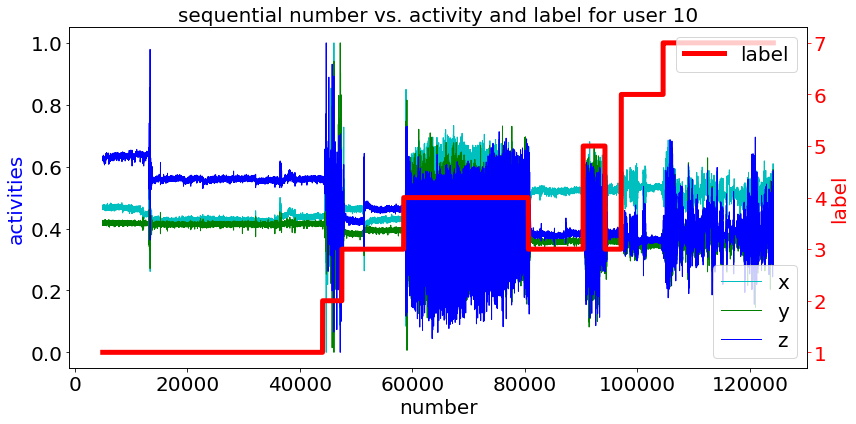

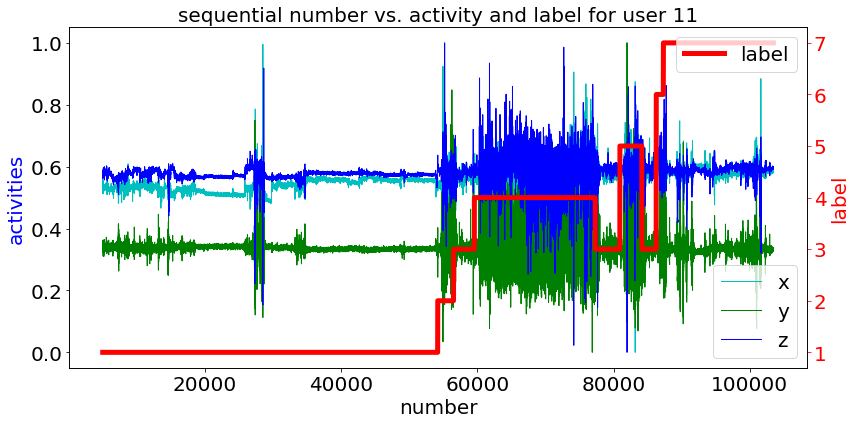

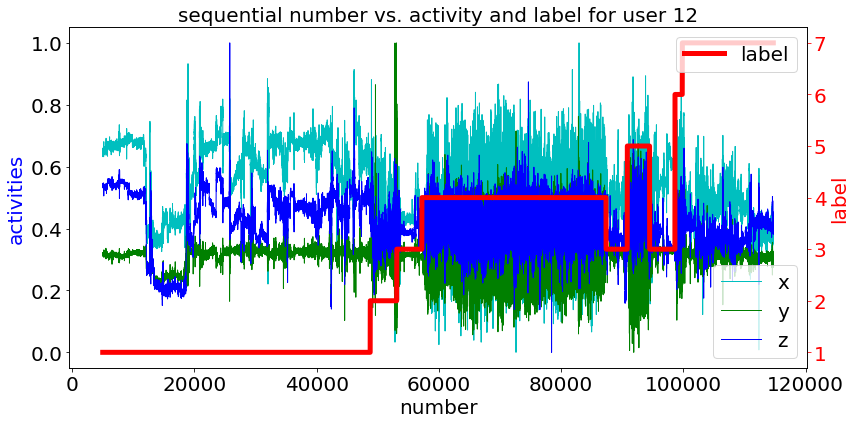

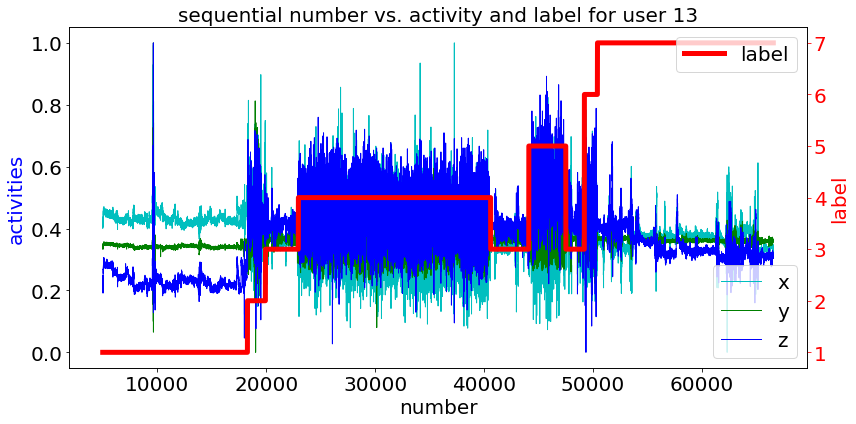

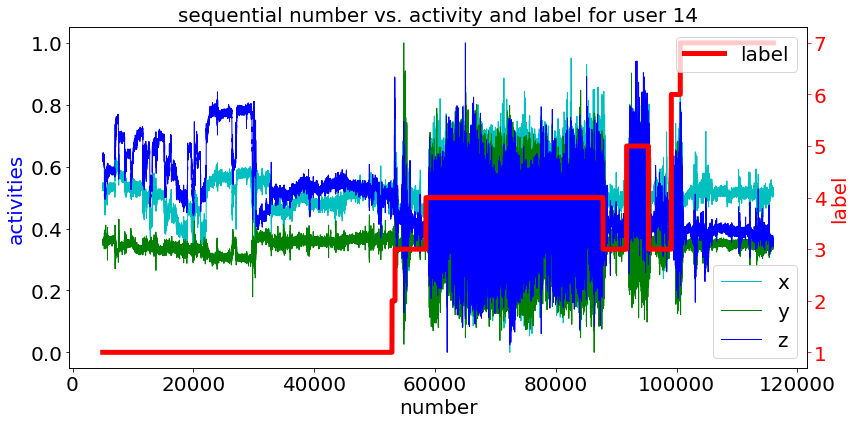

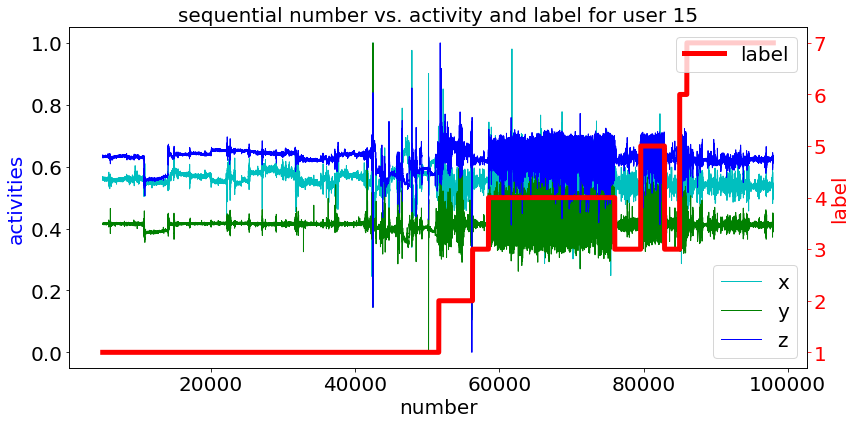

In [25]:
for i in range(0, 15):
    plot_activity(proc_df_sets[i], i + 1)

### smooth x, y, z
Smooth x,y,z data by applying mean value from rolling window

In [26]:
for i in range(0, 15):
    print("user " + str(i+1) + " " + str(proc_df_sets[i].shape))

user 1 (157500, 5)
user 2 (130131, 5)
user 3 (97090, 5)
user 4 (115150, 5)
user 5 (155000, 5)
user 6 (133320, 5)
user 7 (157750, 5)
user 8 (129545, 5)
user 9 (157040, 5)
user 10 (119150, 5)
user 11 (98450, 5)
user 12 (109701, 5)
user 13 (61550, 5)
user 14 (111000, 5)
user 15 (93000, 5)


In [27]:
# Smooth Data By rolling
def smooth_data(user_df):
    win = 52
    user_df['x'] = user_df['x'].rolling(window = win).mean()
    user_df['y'] = user_df['y'].rolling(window = win).mean()
    user_df['z'] = user_df['z'].rolling(window = win).mean()
    return user_df

In [28]:
for i in range(0, 15):
    proc_df_sets[i] = smooth_data(proc_df_sets[i])

In [29]:
for i in range(0, 15):
    print("user " + str(i+1) + " " + str(proc_df_sets[i].shape))

user 1 (157500, 5)
user 2 (130131, 5)
user 3 (97090, 5)
user 4 (115150, 5)
user 5 (155000, 5)
user 6 (133320, 5)
user 7 (157750, 5)
user 8 (129545, 5)
user 9 (157040, 5)
user 10 (119150, 5)
user 11 (98450, 5)
user 12 (109701, 5)
user 13 (61550, 5)
user 14 (111000, 5)
user 15 (93000, 5)


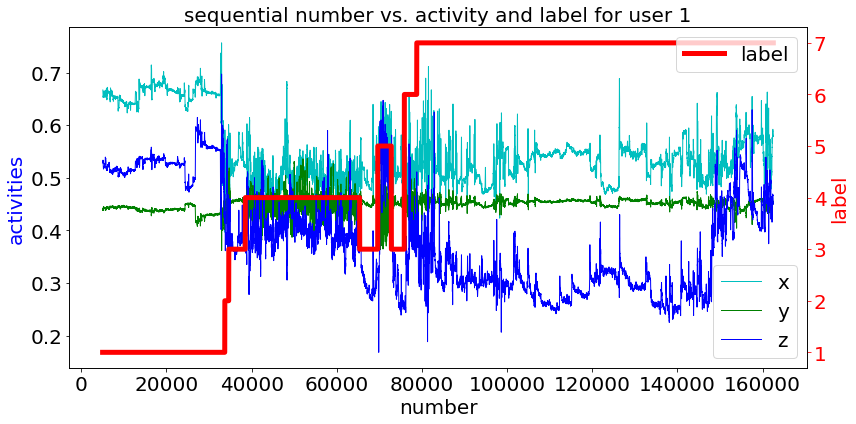

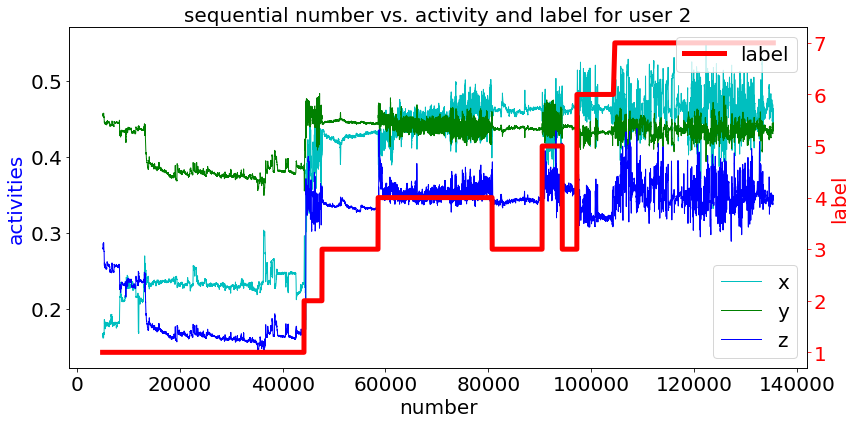

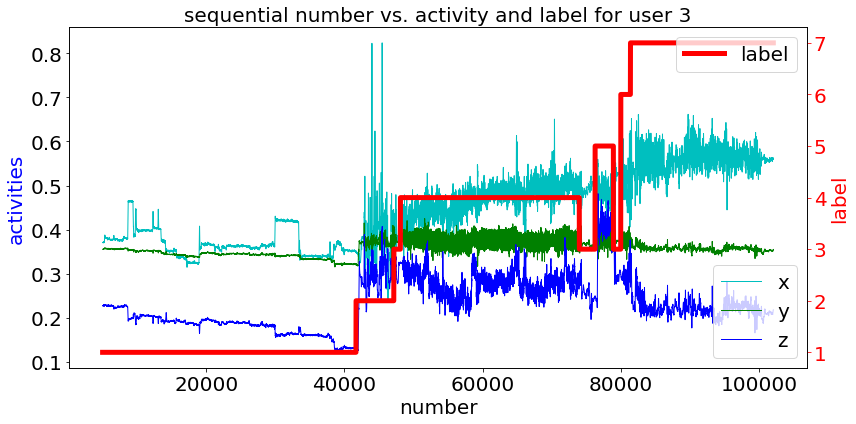

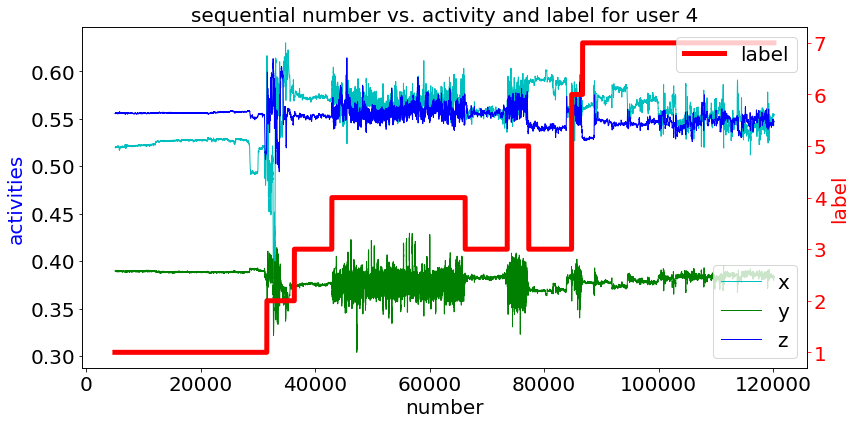

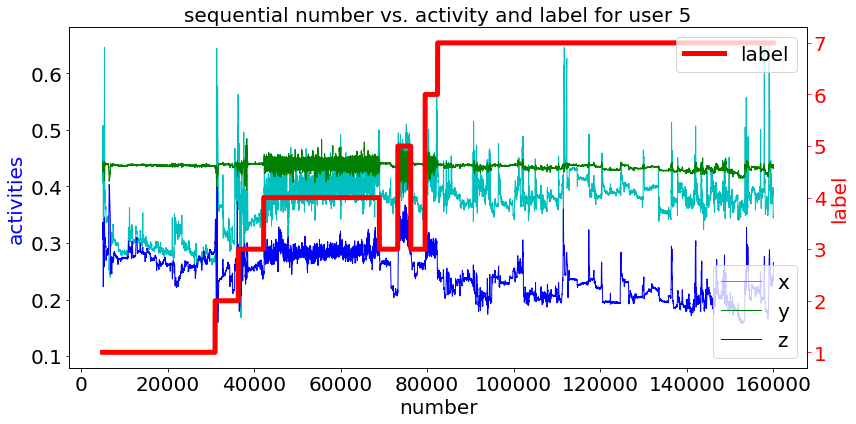

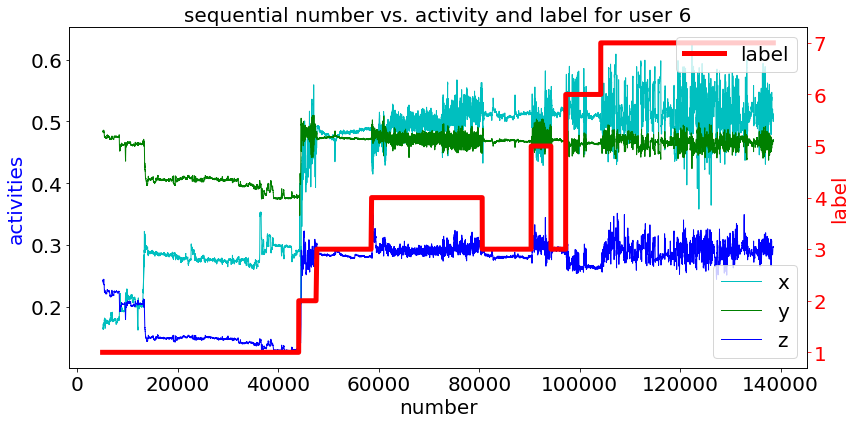

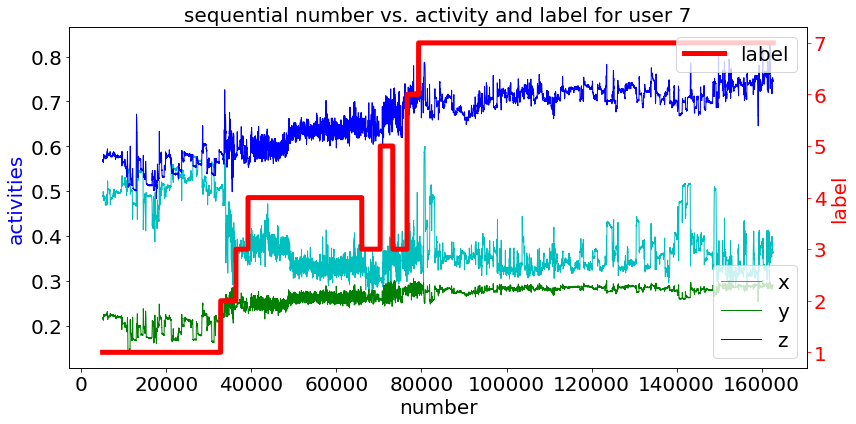

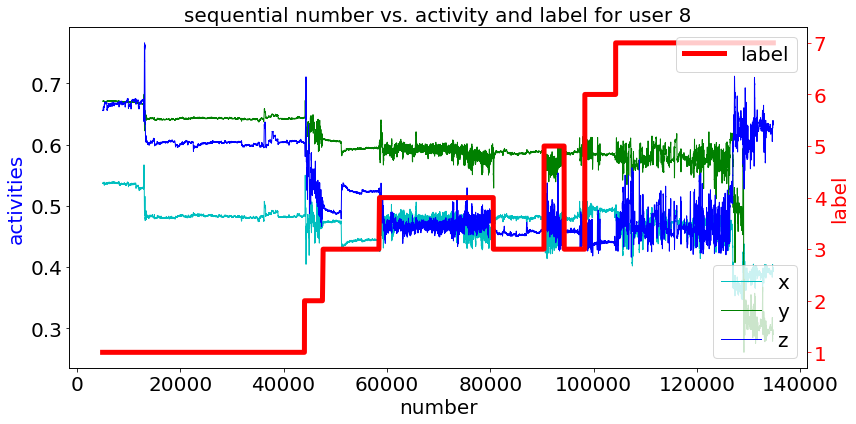

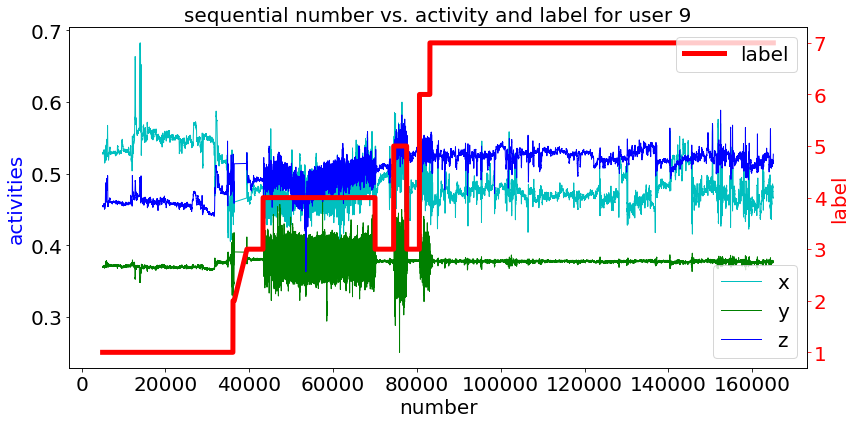

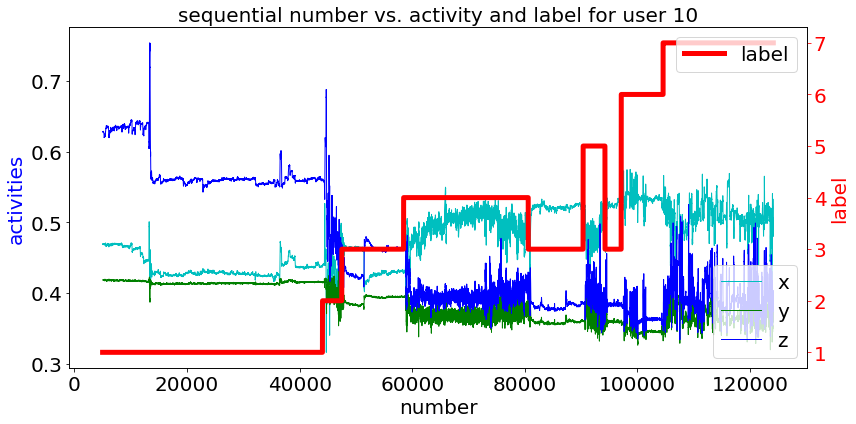

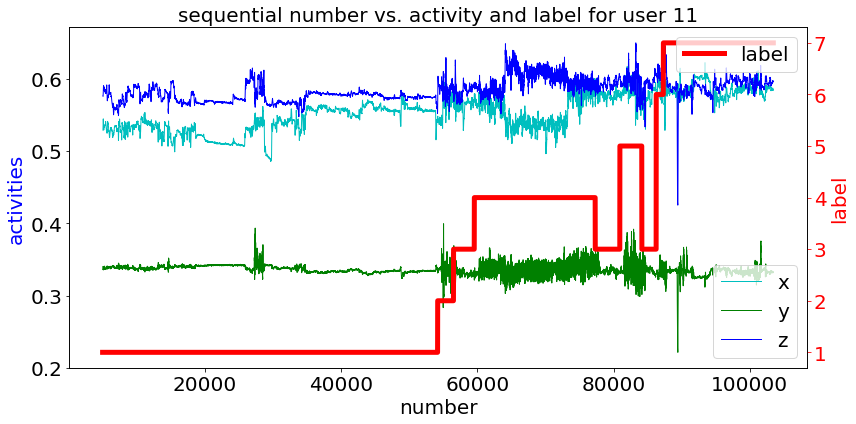

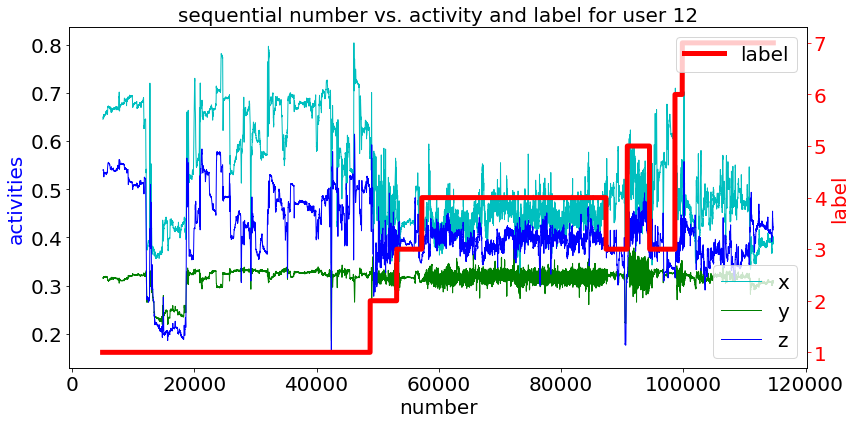

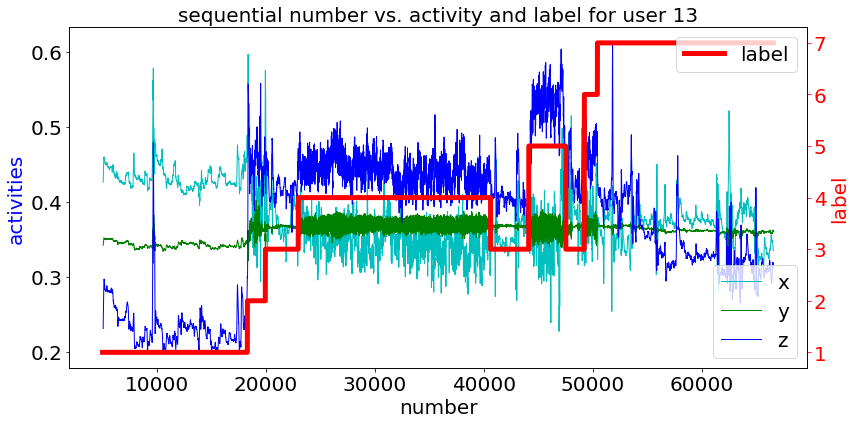

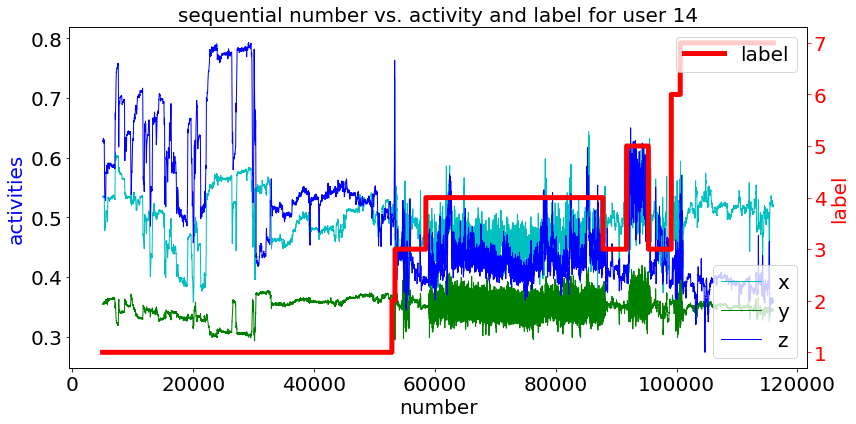

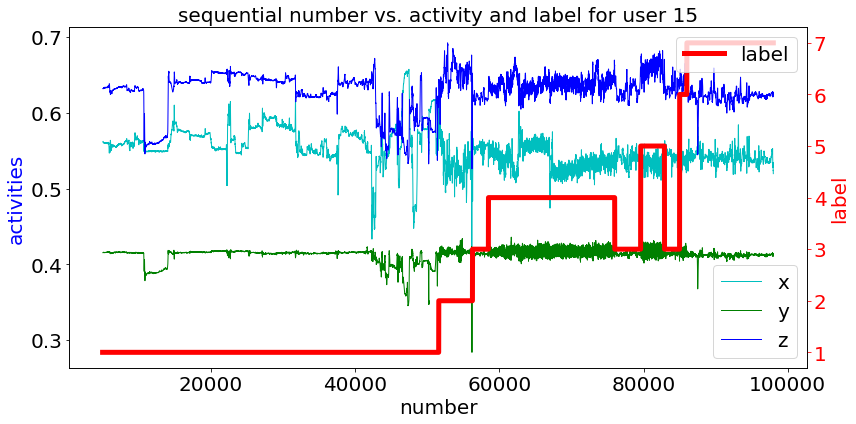

In [30]:
# plot data after smoothing
for i in range(0, 15):
    plot_activity(proc_df_sets[i], i + 1)

# Feature Engineering

here we generate additional features using the existing x,y,z features
* combination of x,y,z features (x+y+z, x*y*z)
* derivative features from x,y,z (min(), max(), mean()...)
* correlation among x, y, z (corr(x,y), corr(x,z)...)
<img src="files/images/3.png", width="500" height="200"/>

In [31]:
# extract new feature from x, y, z axis
# feature to be extraced: 
#     -x,y,z
#     -x+y+z, x*y*z
#     -mean, max, min vaules for x, y, z
#     -quantile at 0.3, 0.5, 0.7 for xyz
#     -std,sem, diff,skew 
#     -corr for xyz

def extract_raw_info(data):

    features = []
    features.append(data['x'])
    features.append(data['y'])
    features.append(data['z'])
    
    features.append(data['x'] + data['y'] + data['z'])
    features.append(data['x'] * data['y'] * data['z'])
    
    features.append(data['x'].min())
    features.append(data['y'].min())
    features.append(data['z'].min())
    features.append(data['x'].mean())
    features.append(data['y'].mean())
    features.append(data['z'].mean())
    features.append(data['x'].min())
    features.append(data['y'].min())
    features.append(data['z'].min())
    features.append(data['x'].max())
    features.append(data['y'].max())
    features.append(data['z'].max())
    for percent in [.3, .5, .7]:
        qt = data.quantile(percent)
        features.append(qt['x'])
        features.append(qt['y'])
        features.append(qt['z'])

    std = data.std()
    features.append(std['x'])
    features.append(std['y'])
    features.append(std['z'])
    
    diff = data.diff()
    features.append(diff['x'].abs().mean())
    features.append(diff['y'].abs().mean())
    features.append(diff['z'].abs().mean())
    
    sem = data.sem()
    features.append(sem['x'])
    features.append(sem['y'])
    features.append(sem['z'])
    
    skew = data.skew()
    features.append(skew['x'])
    features.append(skew['y'])
    features.append(skew['z'])
    
    corr = data.corr()
    features.append(corr.ix['x', 'y'])
    features.append(corr.ix['y', 'z'])
    features.append(corr.ix['z', 'x'])
    
    features.append(np.sqrt(np.mean(np.square(data['x']))))
    features.append(np.sqrt(np.mean(np.square(data['y']))))
    features.append(np.sqrt(np.mean(np.square(data['z']))))
    
    return features



In [32]:
CLASS_NUM = 7
CLASS_MAP = [1, 2, 3, 4, 5, 6, 7]
FREQ = int(52)

def extract_feature(dataset):
    activity_feature = []

    class_map = [1,2,3,4,5,6,7]
    temp = sec_data_by_label(dataset)
    for i in range(len(temp)):
        data = temp[i]
        label = class_map[i]
        step = FREQ

        for start in range(0, len(data), step):
            end = len(data)
            if start + FREQ < len(data):
                end = start + FREQ
            else:
                start = len(data) - FREQ
                if len(data) <= (FREQ // 4 * 3):
                    continue
            seq = data.iloc[start:end]

            features = [label]
            features = features + extract_raw_info(seq)
            activity_feature.append(features)
    return pd.DataFrame(activity_feature)

In [33]:
# select section of dataframe based on label value
# input: data from user
# output: list of 7 dataframes, only one label for each element in the list
# output: list of dataframe (results[0] --> label '1', results[1] --> label '2', .... result[6] --> label '7')
def sec_data_by_label(user_df):
    labels = [1, 2, 3, 4, 5, 6, 7]
    results = []
    for label in labels:
        data = user_df.loc[user_df['label'] == label]
        results.append(data)
    return results

# Modelling_Random Forest

here we start to build a base model using Random Forest, Random Forest is selected due to it’s simplicity, flexiblity and good performance even without hyper-parameter tuning. It is also one of the most used algorithms, because and the fact that it can be used for both classification and regression tasks.Specifically, the following steps are taken to build the random forest model:
* split for train and test data 
    * training data: first 12 user datasets (user 1, 2, ..., 12)
    * test data: last 3 user datasets (user 13, 14, 15)
* cross validation in Training: 10 fold
* use accurancy score as the measuring metric
* build a basic Random Forest Model
* Grid Search to optimize Random Forest
   

### train_test split

here we split the datasets into train data and test data, the train data comes from the first 12 users, the test data come from the last 3 users

<img src="files/images/4.png", width="300" height="200"/>

In [34]:
trainsets = proc_df_sets[:12]
testsets = proc_df_sets[12:]

In [35]:
trainsets = pd.concat(proc_df_sets[0:12])
testsets = pd.concat(proc_df_sets[12:])

In [36]:
trainsets.shape

(1559827, 5)

In [37]:
testsets.shape

(265550, 5)

### extract features for train and test datasets

In [48]:
train_act_feature = extract_feature(trainsets)
test_act_feature = extract_feature(testsets)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:59: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [ ]:
print(train_act_feature.shape)
print(test_act_feature.shape)

In [ ]:
# Get X(input) and Y(output) features from a feature dataframe
# input: feature dataframe after feature extraction
# output: X features and Y feature(label)

def get_X_y(act_fea):
    act_fea.fillna(0, inplace=True)
    act_fea.columns = ['feat_' + str(x) for x in range(act_fea.shape[1])]
    X = act_fea.ix[:,'feat_1':]
    y = act_fea[['feat_0']]
    return X, y

In [ ]:
train_X, train_y= get_X_y(train_act_feature)
test_X, test_y = get_X_y(test_act_feature)

In [ ]:
all_X = pd.concat([train_X, test_X])
all_y = pd.concat([train_y, test_y])

In [ ]:
all_X.tail()

In [ ]:
all_y.shape

In [ ]:
train_X.shape

In [ ]:
train_y.shape

### build a basic RF model

In [ ]:
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import time


# train RF model using 10-fold CV
rf = RandomForestClassifier(
    random_state=1,
    n_estimators=400,
    criterion='entropy',
    n_jobs = -1,
    max_depth=16,
)

time_start = time.time()
predicted = cross_val_predict(rf, train_X, train_y['feat_0'].ravel(), cv=10)
print('Evaluation of RF model on Train Data')
print('RF accuracy score based on 10-fold CV: ', metrics.accuracy_score(train_y['feat_0'].ravel(), predicted))
print('time taken:', time.time() - time_start)

In [ ]:
# use the RF model trained on user data 0-12 to predict behavior for user data 13 - 15
rf.fit(train_X, train_Y['feat_0'].ravel())
pred = rf.predict(test_X)
print('Evaluation of RF model on Test Data')
print('Accuracy score for test datasets: ', metrics.accuracy_score(test_Y['feat_0'].ravel(), pred))

In [ ]:
# feature importance
features=train_X.columns.values
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1, figsize = (10, 40))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(train_Y['feat_0'], predicted)
np.set_printoptions(precision=2)

corr = pd.DataFrame(cnf_matrix, index = [str(x + 1) for x in range(0, CLASS_NUM)],
                  columns = [str(x + 1) for x in range(0, CLASS_NUM)])

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='RdBu_r', annot=True)
plt.title('prediction result confusion matrix')

### Grid Search
 to optimize the parameters for random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=1, criterion='entropy', n_jobs = -1) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [200, 300, 400],
           "max_depth" : [10, 15, 20],
            }
time_start = time.time()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10)
CV_rfc.fit(train_X, train_Y['feat_0'].ravel())
print (CV_rfc.best_params_)
print('time used:', time.time() - time_start)

In [ ]:
rf = RandomForestClassifier(
    random_state=1,
    n_estimators=400,
    criterion = 'entropy',
    min_samples_leaf = 1,
    n_jobs = -1,
    max_depth=15,
)
time_start = time.time()
rf.fit(train_X, train_Y['feat_0'].ravel())
pred = rf.predict(test_X)
print('Accuracy score for test datasets: ', metrics.accuracy_score(test_Y['feat_0'].ravel(), pred))
print('time used:', time.time() - time_start)

# Save Model

In [ ]:
import pickle

In [ ]:
filename = 'final_RF_model.sav'
pickle.dump(rf, open(filename, 'wb'))

# Future Work

With additional time, this project can be improved by excerising the following aspects: 

* More Feature Engineering: 
    
    * Extract **Frequency** information for x, y, z axis using **Fourier transform**
        * fftpack package from scipy
        * a good tutorial can be found here: 
        * Elegant SciPy by Harriet Dashnow, Stéfan van der Walt, Juan Nunez-Iglesias, Chapter 4. Frequency and the Fast Fourier Transform
            https://www.safaribooksonline.com/library/view/elegant-scipy/9781491922927/ch04.html
    * Create additional features by combining x, y, z


* Random Forest Model Optimization
    * Grid Search for other param and in extended space
    * Bayesian Optimization


* Model Algorithm Extention
    * XGBoost
    * CNN


* Model Ensemble
    * ensemble multiple models to improve accurancy


# References
 Reference Papers

   --- Casale, P. Pujol, O. and Radeva, P. 
       "BeaStreamer-v0.1: a new platform for Multi-Sensors Data Acquisition in Wearable Computing Applications", 
       CVCRD09, ISBN: 978-84-937261-1-9, 2009
       available on https://www.researchgate.net/publication/257132489_BeaStreamer-v0.1_a_new_platform_for_Multi-Sensors_Data_Acquisition_in_Wearable_Computing_Applications?ev=prf_pub

   --- Casale, P. Pujol, O. and Radeva, P. 
       "Human activity recognition from accelerometer data using a wearable device", 
       IbPRIA'11, 289-296, Springer-Verlag, 2011
       available on https://www.researchgate.net/publication/221258784_Human_Activity_Recognition_from_Accelerometer_Data_Using_a_Wearable_Device?ev=prf_pub
       
  --- Casale, P. Pujol, O. and Radeva, P. 
       "Personalization and user verification in wearable systems using biometric walking patterns"
       Personal and Ubiquitous Computing, 16(5), 563-580, 2012
       available on https://www.researchgate.net/publication/227192676_Personalization_and_user_verification_in_wearable_systems_using_biometric_walking_patterns?ev=prf_pub